### Dataset information

Link: https://archive.ics.uci.edu/dataset/320/student+performance

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1. **school** - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. **sex** - student's sex (binary: "F" - female or "M" - male)
3. **age** - student's age (numeric: from 15 to 22)
4. **address** - student's home address type (binary: "U" - urban or "R" - rural)
5. **famsize** - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6. **Pstatus** - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7. **Medu** - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. **Fedu** - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. **Mjob** - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10. **Fjob** - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11. **reason** - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12. **guardian** - student's guardian (nominal: "mother", "father" or "other")
13. **traveltime** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. **studytime** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. **failures** - number of past class failures (numeric: n if 1<=n<3, else 4)
16. **schoolsup** - extra educational support (binary: yes or no)
17. **famsup** - family educational support (binary: yes or no)
18. **paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. **activities** - extra-curricular activities (binary: yes or no)
20. **nursery** - attended nursery school (binary: yes or no)
21. **higher** - wants to take higher education (binary: yes or no)
22. **internet** - Internet access at home (binary: yes or no)
23. **romantic** - with a romantic relationship (binary: yes or no)
24. **famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. **freetime** - free time after school (numeric: from 1 - very low to 5 - very high)
26. **goout** - going out with friends (numeric: from 1 - very low to 5 - very high)
27. **Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. **Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. **health** - current health status (numeric: from 1 - very bad to 5 - very good)
30. **absences** - number of school absences (numeric: from 0 to 93)   
these grades are related with the course subject, Math or Portuguese: 
31. **G1** - first period grade (numeric: from 0 to 20)
32. **G2** - second period grade (numeric: from 0 to 20)
33. **G3** - final grade (numeric: from 0 to 20, output target)

**Additional note:** there are several (382) students that belong to both datasets . 
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.


student_identical_attribute=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]


Notebook link: https://www.kaggle.com/code/mohammedezzeldean/predict-student-performance-rf-dt-lr-svm-xgbr-knn

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from math import sqrt
%matplotlib inline

### Data Loading

In [2]:
# Input data files are available in the "./data/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir("./data"))

['student-mat.csv', 'student.zip', 'student.txt', 'student-merge.R', 'student-por.csv']


In [7]:
#Lets load the dataset and sample some
df = pd.read_csv('./data/student-por.csv',delimiter=';')
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [8]:
print("Data Shape: number of Rows = {0}, number of Columns = {1}".format(df.shape[0],df.shape[1]))

Data Shape: number of Rows = 649, number of Columns = 33


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [10]:
print("Show Statical Description of numerical columns")
df.describe().T

Show Statical Description of numerical columns


,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


### Data Cleaning

In [13]:
#check for missing values
print(f"Total missing: {df.isnull().sum().sum() }")
df.isnull().sum()

Total missing: 0


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [14]:
# check for duplicates
df.duplicated().value_counts()

False    649
Name: count, dtype: int64

### Visualization

Female: 383
Male: 266


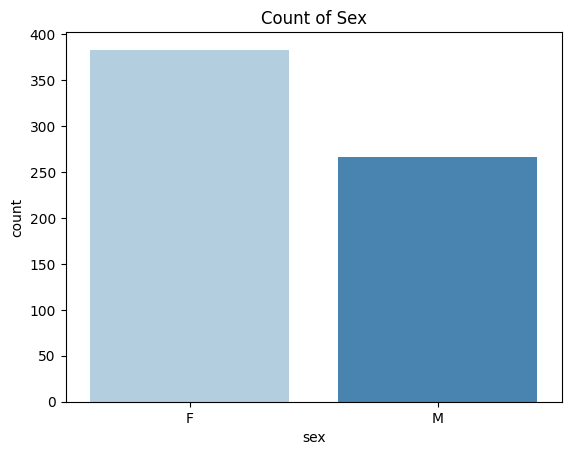

In [16]:
# Ignore warnings
warnings.filterwarnings("ignore")

# Count the occurrences of each category in the 'sex' column
target_count = df.sex.value_counts()

# Print the count of females
print('Female:', target_count[0])

# Print the count of males
print('Male:', target_count[1])

# Create a count plot of 'sex' with seaborn
sns.countplot(data=df, x="sex", hue="sex", palette="Blues")

# Set the title of the plot
plt.title('Count of Sex') 
plt.show()

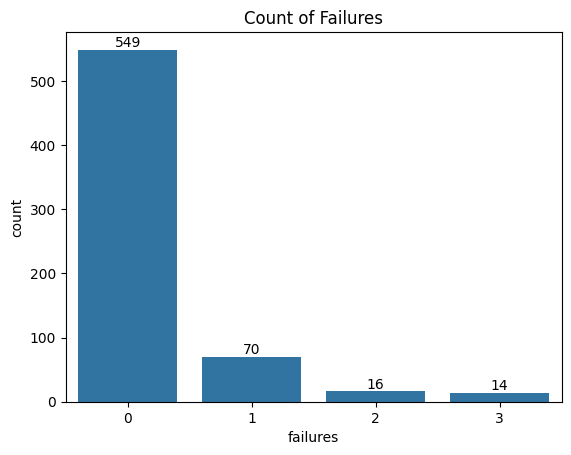

In [39]:
# Ignore warnings
warnings.filterwarnings("ignore")

data=df.failures.value_counts().reset_index(name='count')

ax=sns.barplot(data=data,x='failures',y='count')

ax.bar_label(ax.containers[0], fontsize=10)

# Set the title of the plot
plt.title('Count of Failures') 
plt.show()

   failures sex  count
0         0   F    329
1         0   M    220
2         1   F     42
3         1   M     28
4         2   F      7
5         2   M      9
6         3   F      5
7         3   M      9


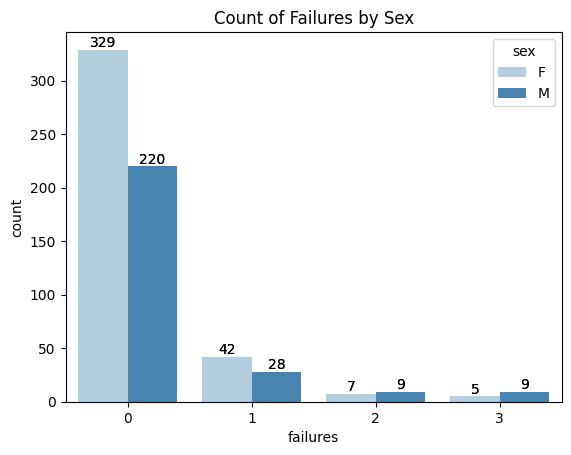

In [50]:
# Grouping the DataFrame by 'failures' and 'sex', counting the occurrences, and resetting the index
failure_counts = df.groupby(["failures", "sex"]).size().reset_index(name="count")

# Printing the DataFrame showing counts of failures by sex
print(failure_counts)

# Creating a count plot of 'failures' with seaborn, differentiated by 'sex'
ax=sns.countplot(data=df, x="failures", hue="sex", palette="Blues")

for i in range(2):
    ax.bar_label(ax.containers[i], fontsize=10)
    ax.bar_label(ax.containers[i], fontsize=10)

# Setting the title of the plot
plt.title('Count of Failures by Sex')
plt.show()

    failures  age  count
0          0   15    108
1          0   16    161
2          0   17    153
3          0   18    112
4          0   19     13
5          0   20      2
6          1   15      4
7          1   16     12
8          1   17     19
9          1   18     19
10         1   19     13
11         1   20      3
12         2   16      3
13         2   17      1
14         2   18      6
15         2   19      3
16         2   20      1
17         2   21      2
18         3   16      1
19         3   17      6
20         3   18      3
21         3   19      3
22         3   22      1


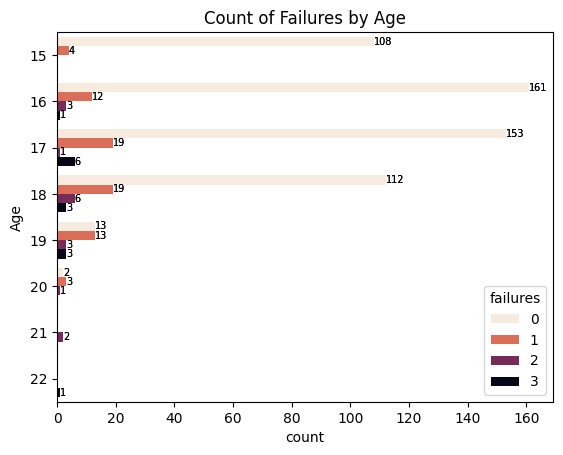

In [53]:
# Grouping the DataFrame by 'failures' and 'age', counting the occurrences, and resetting the index
failure_counts = df.groupby(["failures", "age"]).size().reset_index(name="count")

# Printing the DataFrame showing counts of failures by age
print(failure_counts)

# Creating a count plot of 'failures' with seaborn, differentiated by 'age' and plotted horizontally
ax=sns.countplot(data=df, y='age', hue='failures', palette="rocket_r")

for i in range(4):
    ax.bar_label(ax.containers[i], fontsize=7)
    ax.bar_label(ax.containers[i], fontsize=7)

# Setting the title of the plot
plt.title('Count of Failures by Age')

# Setting the label for the y-axis
plt.ylabel('Age')
plt.show()

In [24]:
df.pivot_table(index='failures', columns='address', aggfunc='size')

address,R,U
failures,,
0,157,392
1,31,39
2,3,13
3,6,8


Text(50.722222222222214, 0.5, 'Number of Failures')

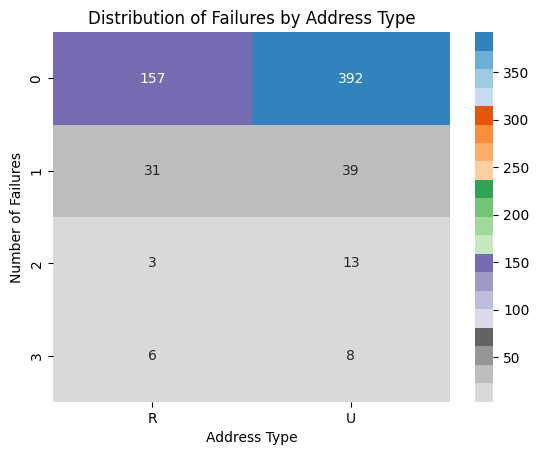

In [25]:
# Create a pivot table to count the occurrences of failures for each address type
pivot_table = df.pivot_table(index='failures', columns='address', aggfunc='size')

# Plot the heatmap using seaborn, with annotations, a colormap, and format for annotations
sns.heatmap(pivot_table, annot=True, cmap='tab20c_r', fmt='g')

# Add title to the plot
plt.title('Distribution of Failures by Address Type')

# Add label for the x-axis
plt.xlabel('Address Type')

# Add label for the y-axis
plt.ylabel('Number of Failures')

Text(50.722222222222214, 0.5, 'Number of Failures')

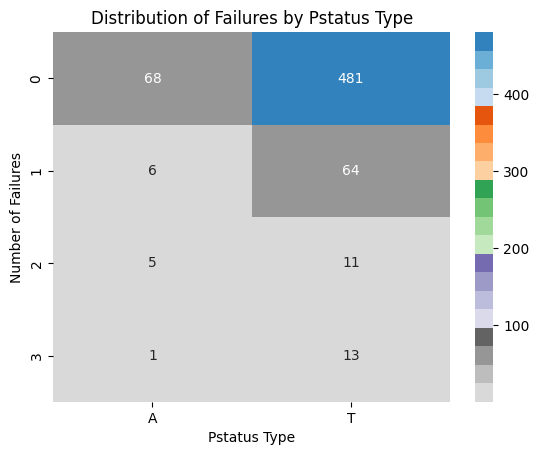

In [26]:
# Create a pivot table to count the occurrences of failures for each Pstatus type
pivot_table = df.pivot_table(index='failures', columns='Pstatus', aggfunc='size')

# Plot the heatmap using seaborn, with annotations, a colormap, and format for annotations
sns.heatmap(pivot_table, annot=True, cmap='tab20c_r', fmt='g')

# Add title to the plot
plt.title('Distribution of Failures by Pstatus Type')

# Add label for the x-axis
plt.xlabel('Pstatus Type')

# Add label for the y-axis
plt.ylabel('Number of Failures')

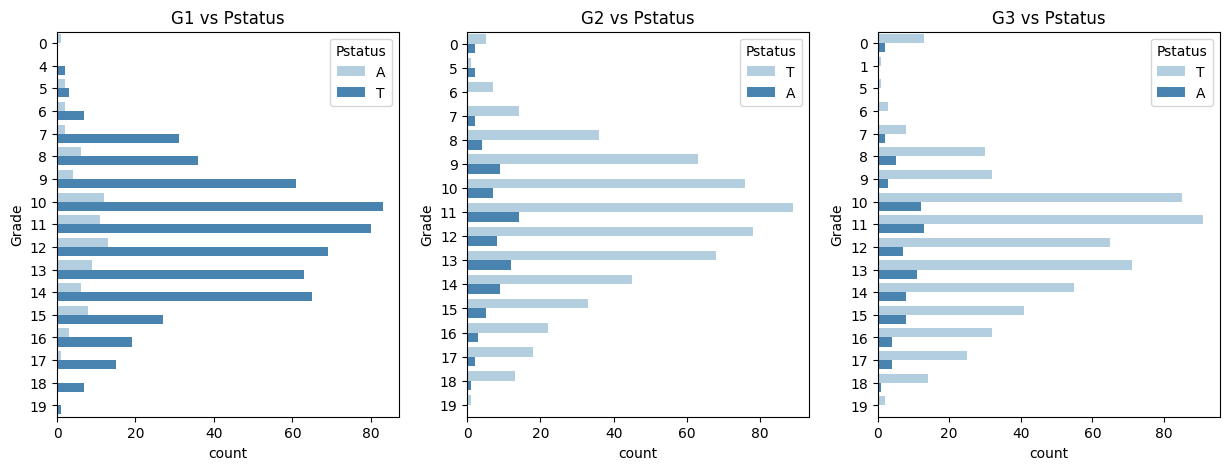

G1 
    Pstatus  G1  count
0        A   0      1
1        A   5      2
2        A   6      2
3        A   7      2
4        A   8      6
5        A   9      4
6        A  10     12
7        A  11     11
8        A  12     13
9        A  13      9
10       A  14      6
11       A  15      8
12       A  16      3
13       A  17      1
14       T   4      2
15       T   5      3
16       T   6      7
17       T   7     31
18       T   8     36
19       T   9     61
20       T  10     83
21       T  11     80
22       T  12     69
23       T  13     63
24       T  14     65
25       T  15     27
26       T  16     19
27       T  17     15
28       T  18      7
29       T  19      1


G2 
    Pstatus  G2  count
0        A   0      2
1        A   5      2
2        A   7      2
3        A   8      4
4        A   9      9
5        A  10      7
6        A  11     14
7        A  12      8
8        A  13     12
9        A  14      9
10       A  15      5
11       A  16      3
12       A  17      

In [54]:
# Create subplots with 1 row and 3 columns, sharing y-axis
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

# Iterate through grade periods and plot
for i, grade_period in enumerate(['G1', 'G2', 'G3']):
    sns.countplot(ax=axes[i], data=df, y=grade_period, hue="Pstatus", palette="Blues")
    axes[i].set_title(f'{grade_period} vs Pstatus')
    axes[i].set_ylabel("Grade")

# Show the plots
plt.show()

# Define columns for grade periods
columns = ["G1", "G2", "G3"]

# Iterate through grade periods
for i in range(len(columns)):
    # Group the DataFrame by 'Pstatus' and the current grade period, counting occurrences, and reset the index
    Pstatus_counts = df.groupby(["Pstatus", columns[i]]).size().reset_index(name="count")
    # Print the results
    print(columns[i],"\n",Pstatus_counts)
    print("\n")

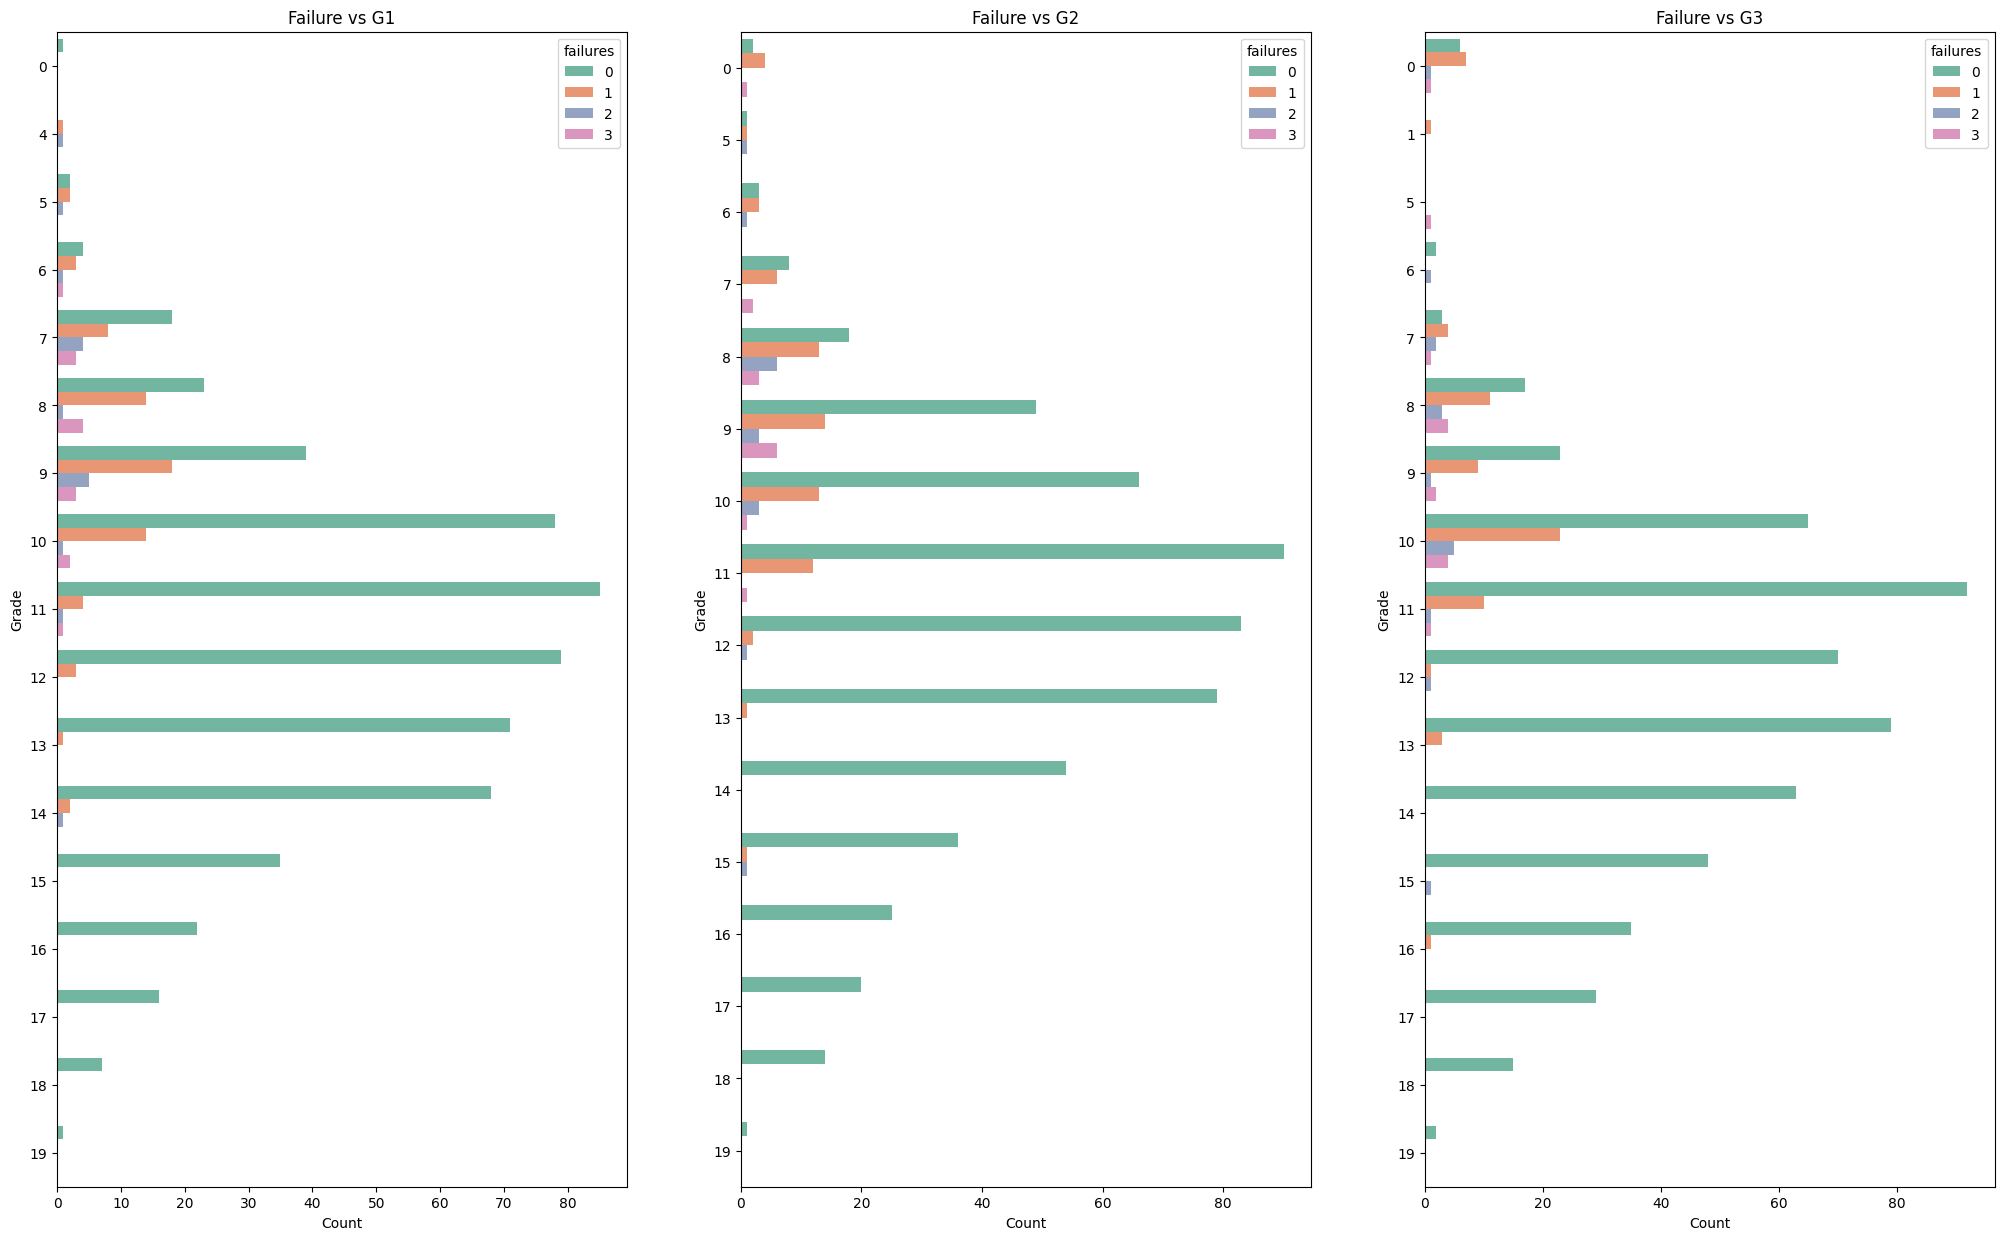

G1 
     failures  G1  count
0          0   0      1
1          0   5      2
2          0   6      4
3          0   7     18
4          0   8     23
5          0   9     39
6          0  10     78
7          0  11     85
8          0  12     79
9          0  13     71
10         0  14     68
11         0  15     35
12         0  16     22
13         0  17     16
14         0  18      7
15         0  19      1
16         1   4      1
17         1   5      2
18         1   6      3
19         1   7      8
20         1   8     14
21         1   9     18
22         1  10     14
23         1  11      4
24         1  12      3
25         1  13      1
26         1  14      2
27         2   4      1
28         2   5      1
29         2   6      1
30         2   7      4
31         2   8      1
32         2   9      5
33         2  10      1
34         2  11      1
35         2  14      1
36         3   6      1
37         3   7      3
38         3   8      4
39         3   9      3
40         

In [55]:
# Create subplots with 1 row and 3 columns, adjusting figure size
fig, axes = plt.subplots(1, 3, figsize=(25, 15))

# Iterate through grade periods and plot
for i, grade in enumerate(['G1', 'G2', 'G3']):
    sns.countplot(data=df, y=grade, hue='failures', ax=axes[i], palette='Set2', dodge=True)
    axes[i].set_title(f'Failure vs {grade}')  # Set title for each subplot
    axes[i].set_ylabel('Grade')  # Set label for y-axis
    axes[i].set_xlabel('Count')  # Set label for x-axis

# Show the plots
plt.show()

# Define columns for grade periods
columns = ["G1", "G2", "G3"]

# Iterate through grade periods
for i in range(len(columns)):
    # Group the DataFrame by 'failures' and the current grade period, counting occurrences, and reset the index
    failures_counts = df.groupby(["failures", columns[i]]).size().reset_index(name="count")
    # Print the results
    print(columns[i],"\n",failures_counts)
    print("\n")

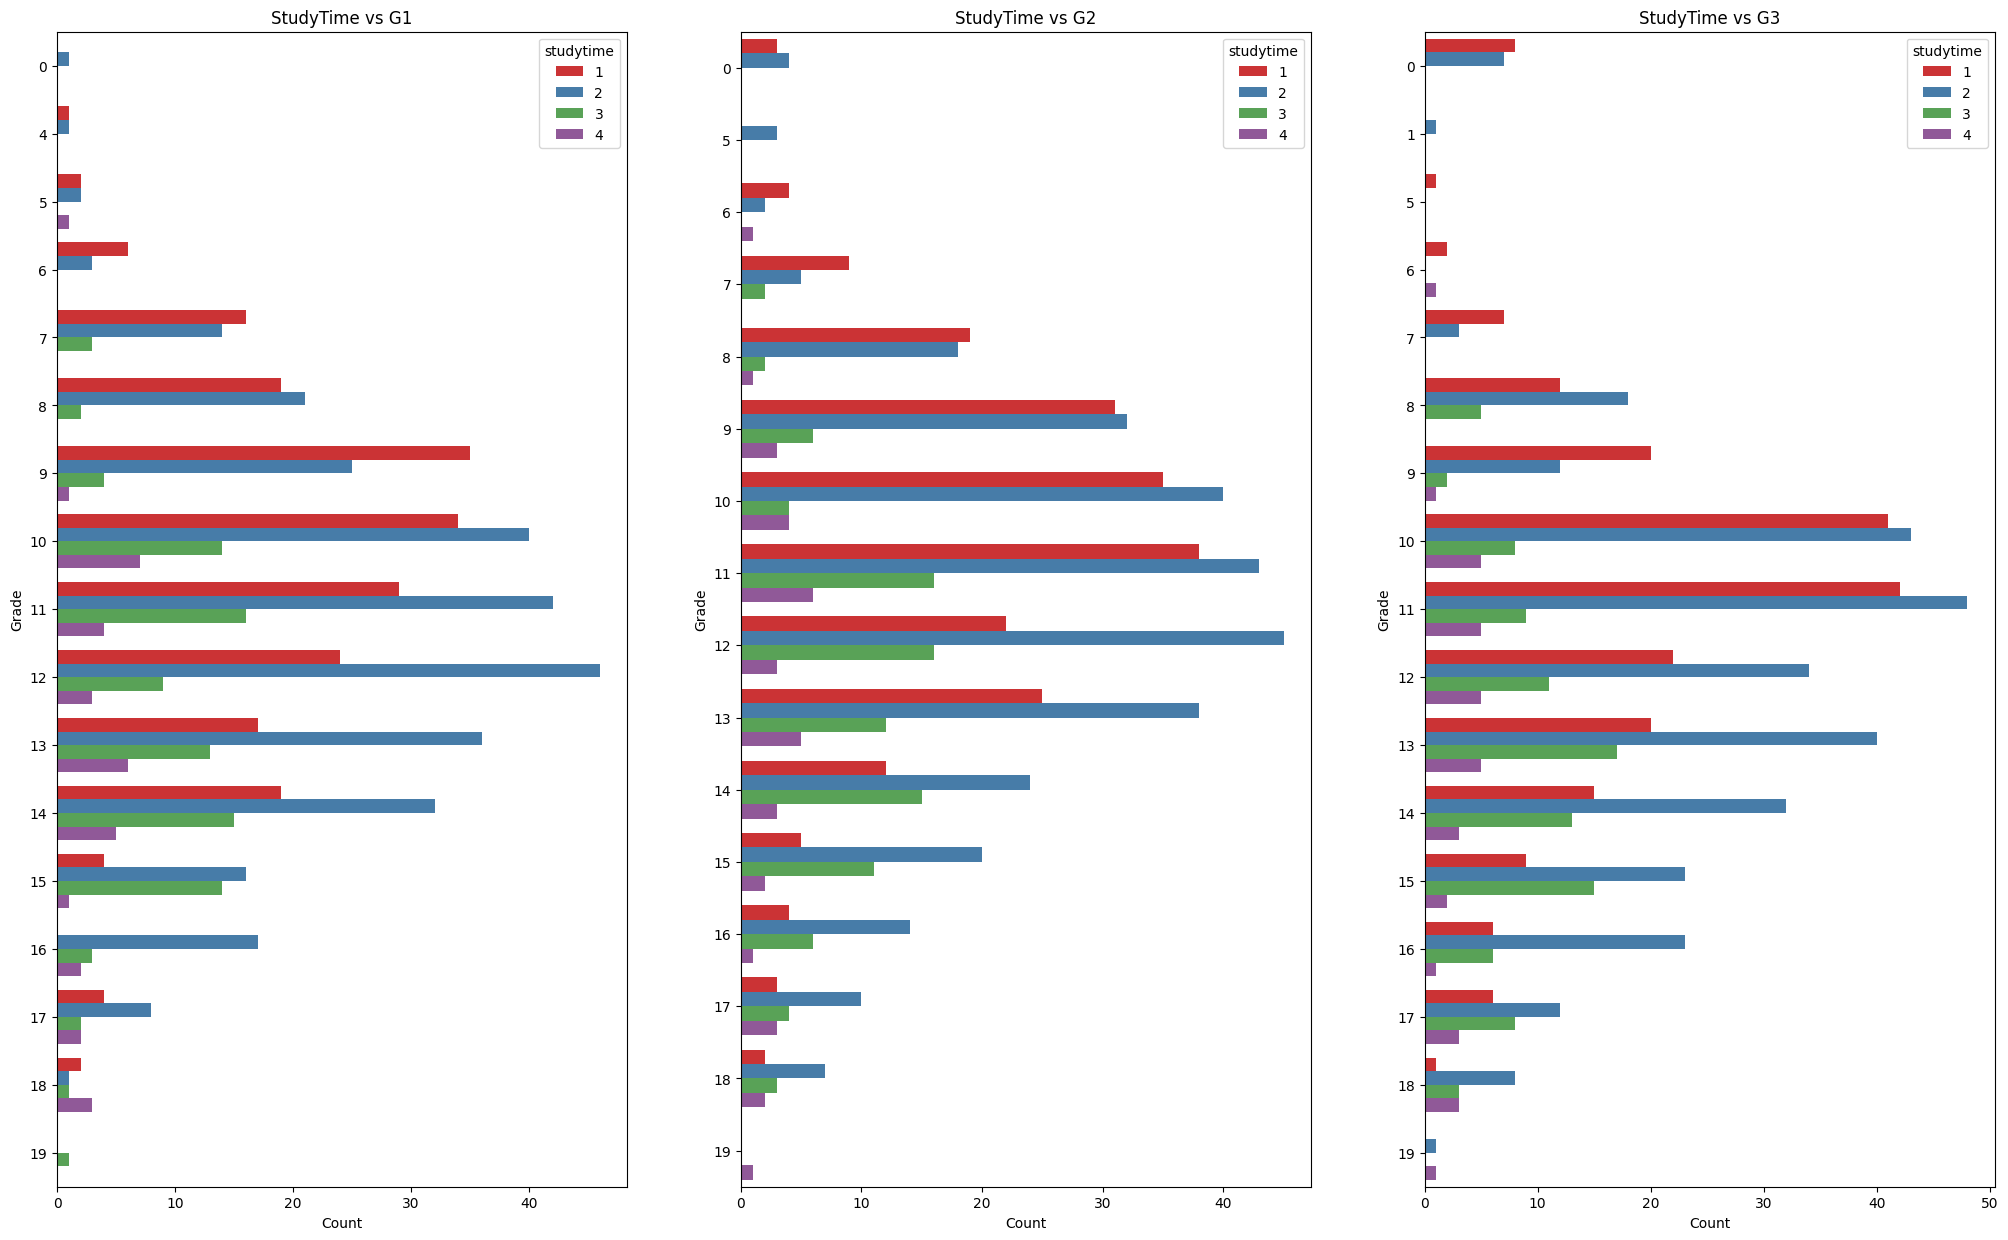

G1 
     studytime  G1  count
0           1   4      1
1           1   5      2
2           1   6      6
3           1   7     16
4           1   8     19
5           1   9     35
6           1  10     34
7           1  11     29
8           1  12     24
9           1  13     17
10          1  14     19
11          1  15      4
12          1  17      4
13          1  18      2
14          2   0      1
15          2   4      1
16          2   5      2
17          2   6      3
18          2   7     14
19          2   8     21
20          2   9     25
21          2  10     40
22          2  11     42
23          2  12     46
24          2  13     36
25          2  14     32
26          2  15     16
27          2  16     17
28          2  17      8
29          2  18      1
30          3   7      3
31          3   8      2
32          3   9      4
33          3  10     14
34          3  11     16
35          3  12      9
36          3  13     13
37          3  14     15
38          3  15   

In [56]:
# Create subplots with 1 row and 3 columns, adjusting figure size
fig, axes = plt.subplots(1, 3, figsize=(25, 15))

# Iterate through grade periods and plot
for i, grade in enumerate(['G1', 'G2', 'G3']):
    sns.countplot(data=df, y=grade, hue='studytime', ax=axes[i], palette='Set1', dodge=True)
    axes[i].set_title(f'StudyTime vs {grade}')  # Set title for each subplot
    axes[i].set_ylabel('Grade')  # Set label for y-axis
    axes[i].set_xlabel('Count')  # Set label for x-axis

# Show the plots
plt.show()

# Define columns for grade periods
columns = ["G1", "G2", "G3"]

# Iterate through grade periods
for i in range(len(columns)):
    # Group the DataFrame by 'studytime' and the current grade period, counting occurrences, and reset the index
    studytime_counts = df.groupby(["studytime", columns[i]]).size().reset_index(name="count")
    # Print the results
    print(columns[i],"\n",studytime_counts)
    print("\n")

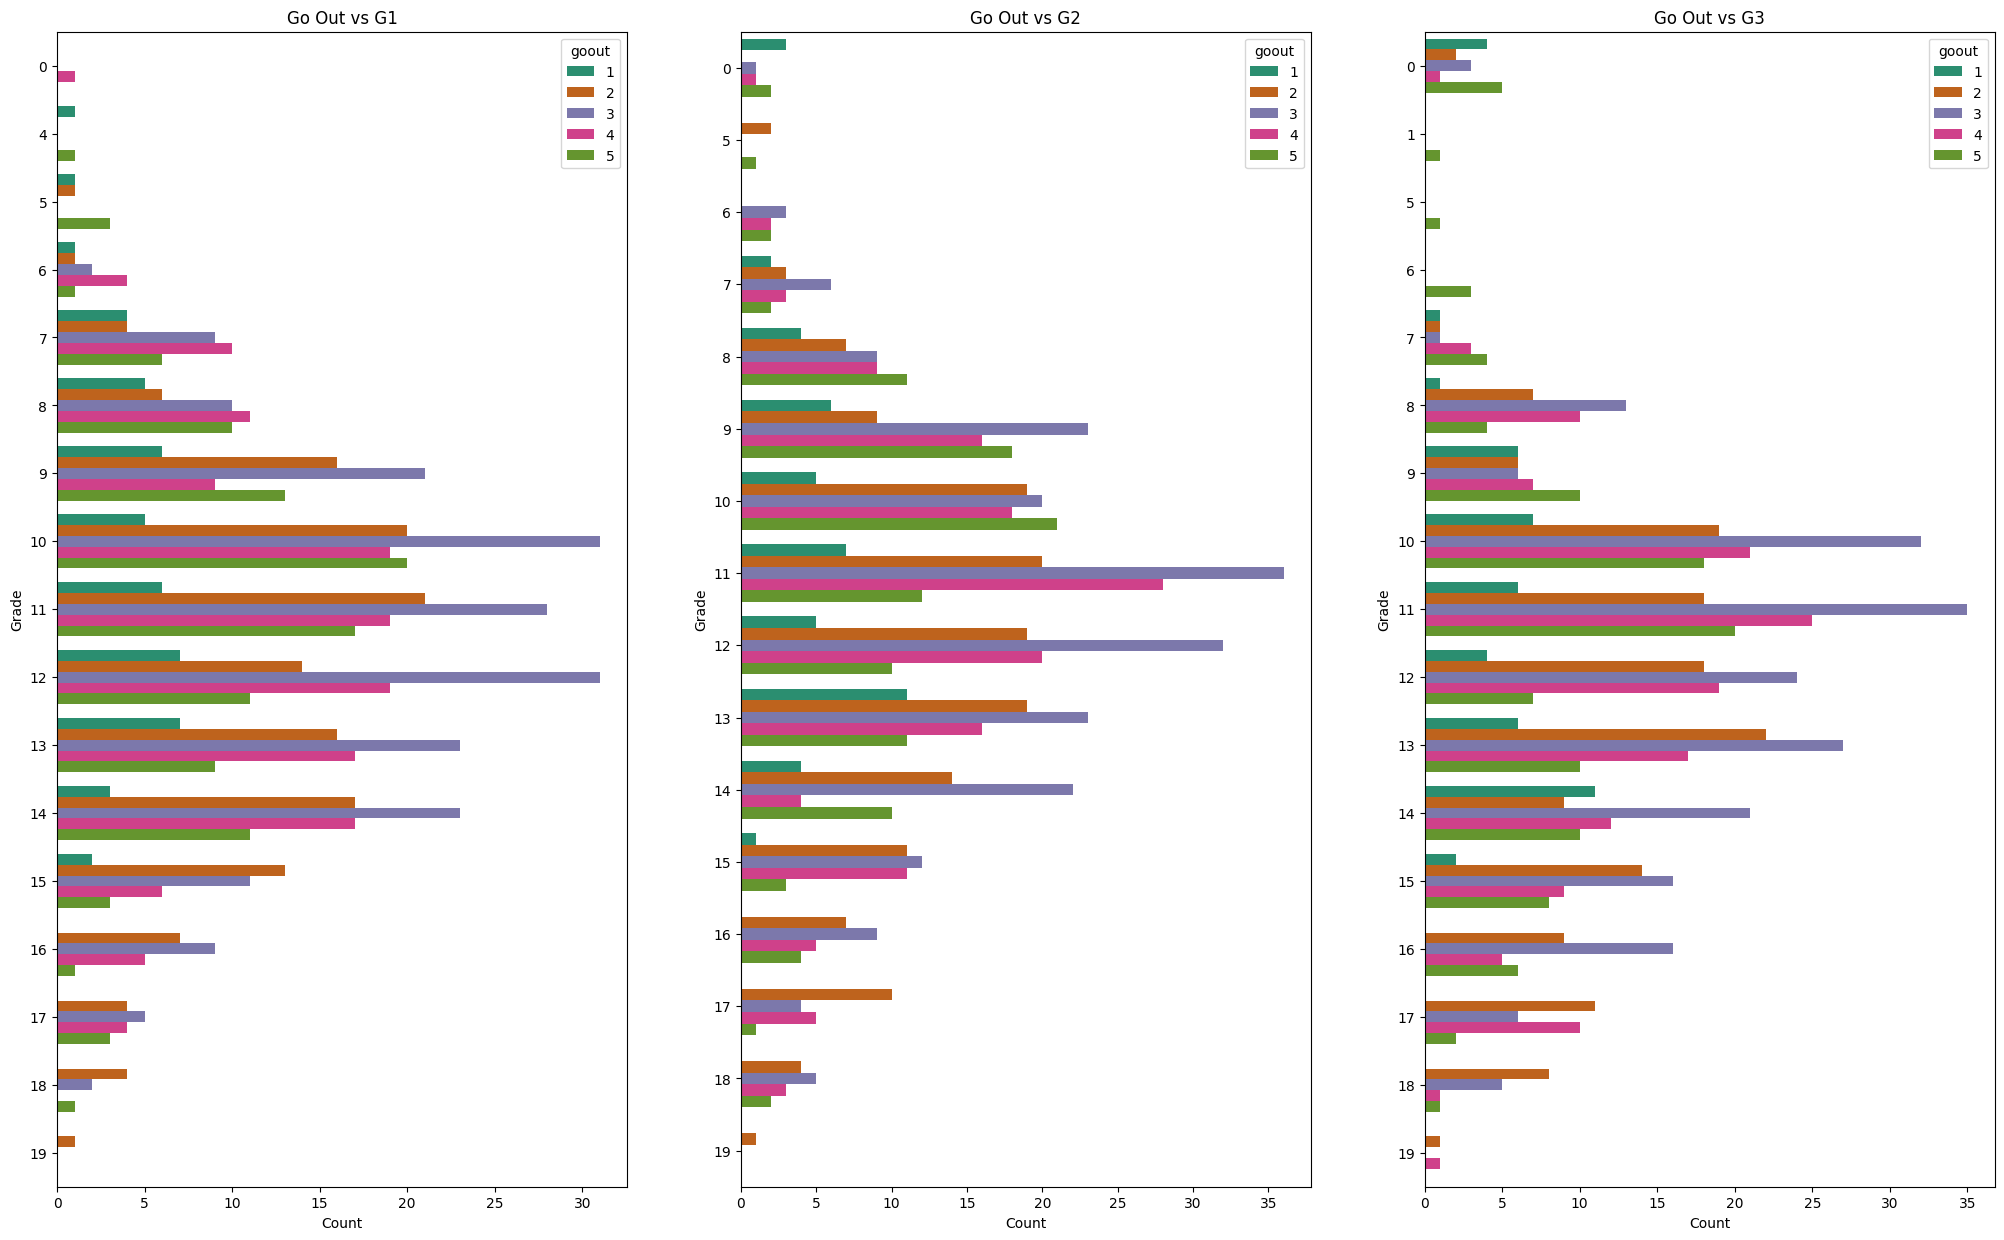

G1 
     goout  G1  count
0       1   4      1
1       1   5      1
2       1   6      1
3       1   7      4
4       1   8      5
..    ...  ..    ...
63      5  14     11
64      5  15      3
65      5  16      1
66      5  17      3
67      5  18      1

[68 rows x 3 columns]


G2 
     goout  G2  count
0       1   0      3
1       1   7      2
2       1   8      4
3       1   9      6
4       1  10      5
..    ...  ..    ...
62      5  14     10
63      5  15      3
64      5  16      4
65      5  17      1
66      5  18      2

[67 rows x 3 columns]


G3 
     goout  G3  count
0       1   0      4
1       1   7      1
2       1   8      1
3       1   9      6
4       1  10      7
..    ...  ..    ...
62      5  14     10
63      5  15      8
64      5  16      6
65      5  17      2
66      5  18      1

[67 rows x 3 columns]




In [57]:
# Create subplots with 1 row and 3 columns, adjusting figure size
fig, axes = plt.subplots(1, 3, figsize=(25, 15))

# Iterate through grade periods and plot
for i, grade in enumerate(['G1', 'G2', 'G3']):
    sns.countplot(data=df, y=grade, hue='goout', ax=axes[i], palette='Dark2', dodge=True)
    axes[i].set_title(f'Go Out vs {grade}')  # Set title for each subplot
    axes[i].set_ylabel('Grade')  # Set label for y-axis
    axes[i].set_xlabel('Count')  # Set label for x-axis

# Show the plots
plt.show()

# Define columns for grade periods
columns = ["G1", "G2", "G3"]

# Iterate through grade periods
for i in range(len(columns)):
    # Group the DataFrame by 'goout' and the current grade period, counting occurrences, and reset the index
    goout_counts = df.groupby(["goout", columns[i]]).size().reset_index(name="count")
    # Print the results
    print(columns[i],"\n",goout_counts)
    print("\n")

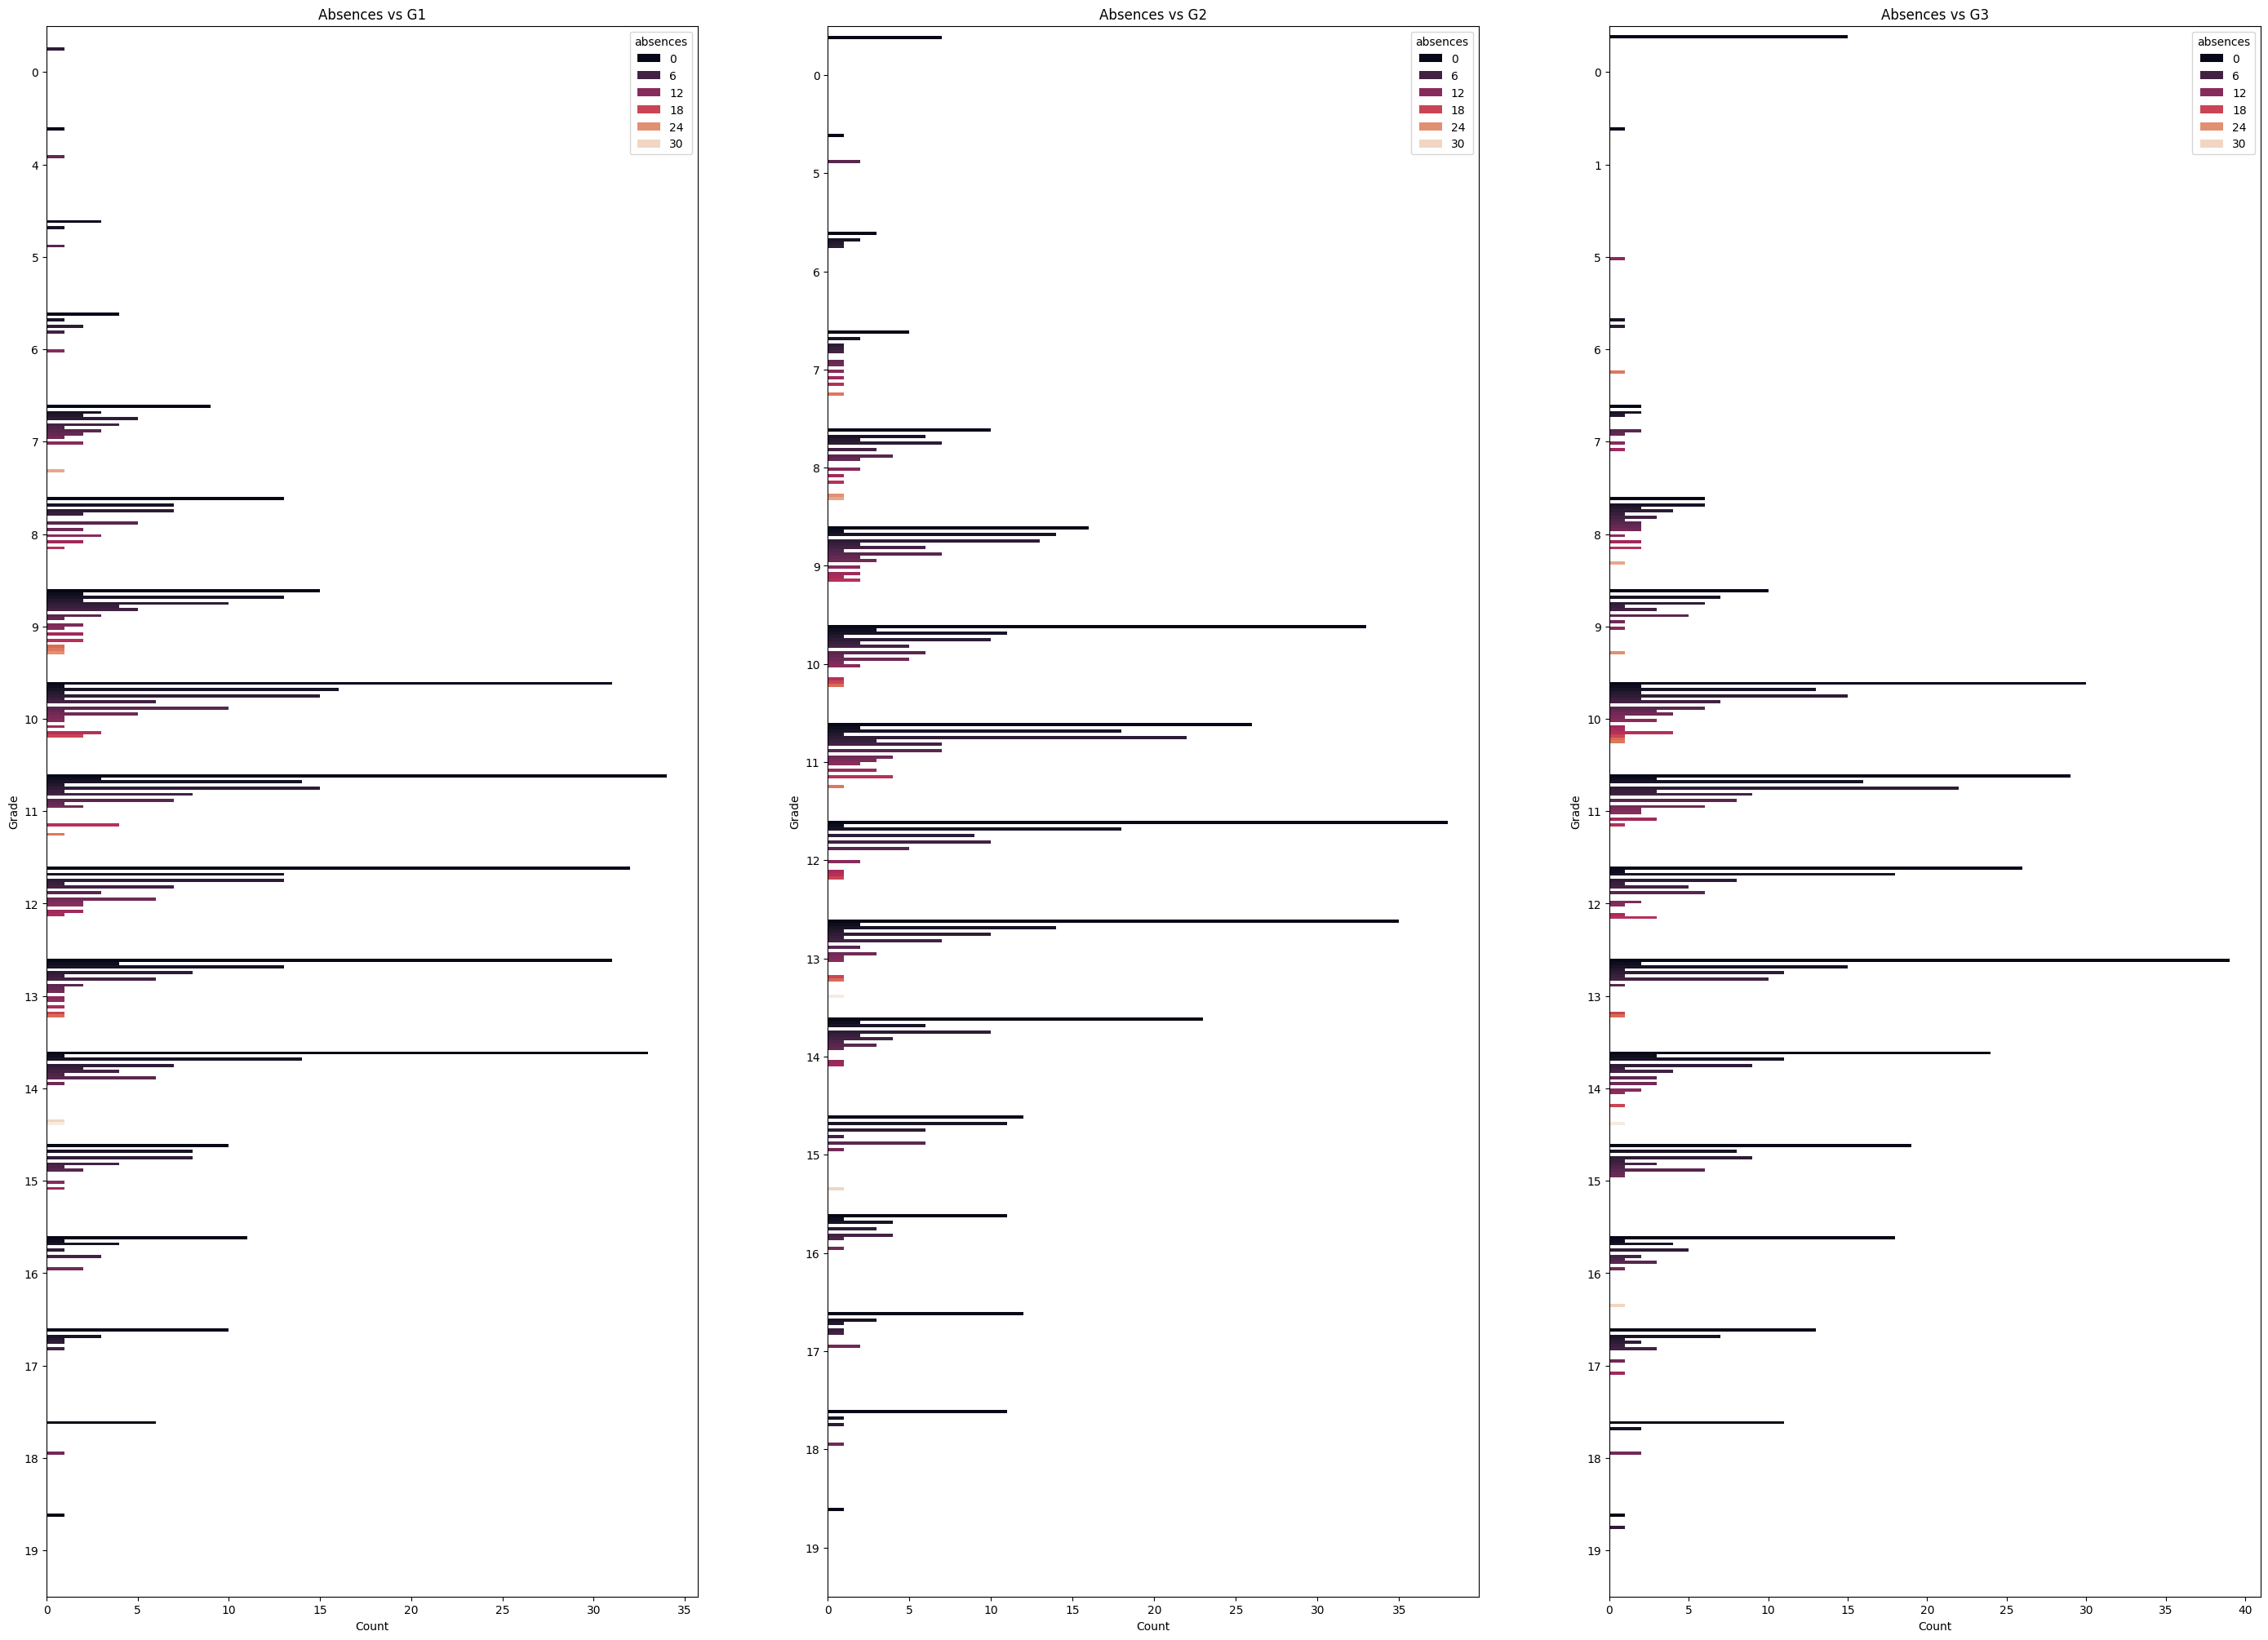

G1 
      absences  G1  count
0           0   4      1
1           0   5      3
2           0   6      4
3           0   7      9
4           0   8     13
..        ...  ..    ...
127        22  11      1
128        24   9      1
129        26   7      1
130        30  14      1
131        32  14      1

[132 rows x 3 columns]


G2 
      absences  G2  count
0           0   0      7
1           0   5      1
2           0   6      3
3           0   7      5
4           0   8     10
..        ...  ..    ...
128        22  11      1
129        24   8      1
130        26   8      1
131        30  15      1
132        32  13      1

[133 rows x 3 columns]


G3 
      absences  G3  count
0           0   0     15
1           0   1      1
2           0   7      2
3           0   8      6
4           0   9     10
..        ...  ..    ...
125        22  10      1
126        24   9      1
127        26   8      1
128        30  16      1
129        32  14      1

[130 rows x 3 columns]




In [58]:
# Create subplots with 1 row and 3 columns, adjusting figure size
fig, axes = plt.subplots(1, 3, figsize=(35, 25))

# Iterate through grade periods and plot
for i, grade in enumerate(['G1', 'G2', 'G3']):
    sns.countplot(data=df, y=grade, hue='absences', ax=axes[i], palette='rocket', dodge=True)
    axes[i].set_title(f'Absences vs {grade}')  # Set title for each subplot
    axes[i].set_ylabel('Grade')  # Set label for y-axis
    axes[i].set_xlabel('Count')  # Set label for x-axis

# Show the plots
plt.show()

# Define columns for grade periods
columns = ["G1", "G2", "G3"]

# Iterate through grade periods
for i in range(len(columns)):
    # Group the DataFrame by 'absences' and the current grade period, counting occurrences, and reset the index
    absences_counts = df.groupby(["absences", columns[i]]).size().reset_index(name="count")
    # Print the results
    print(columns[i],"\n",absences_counts)
    print("\n")

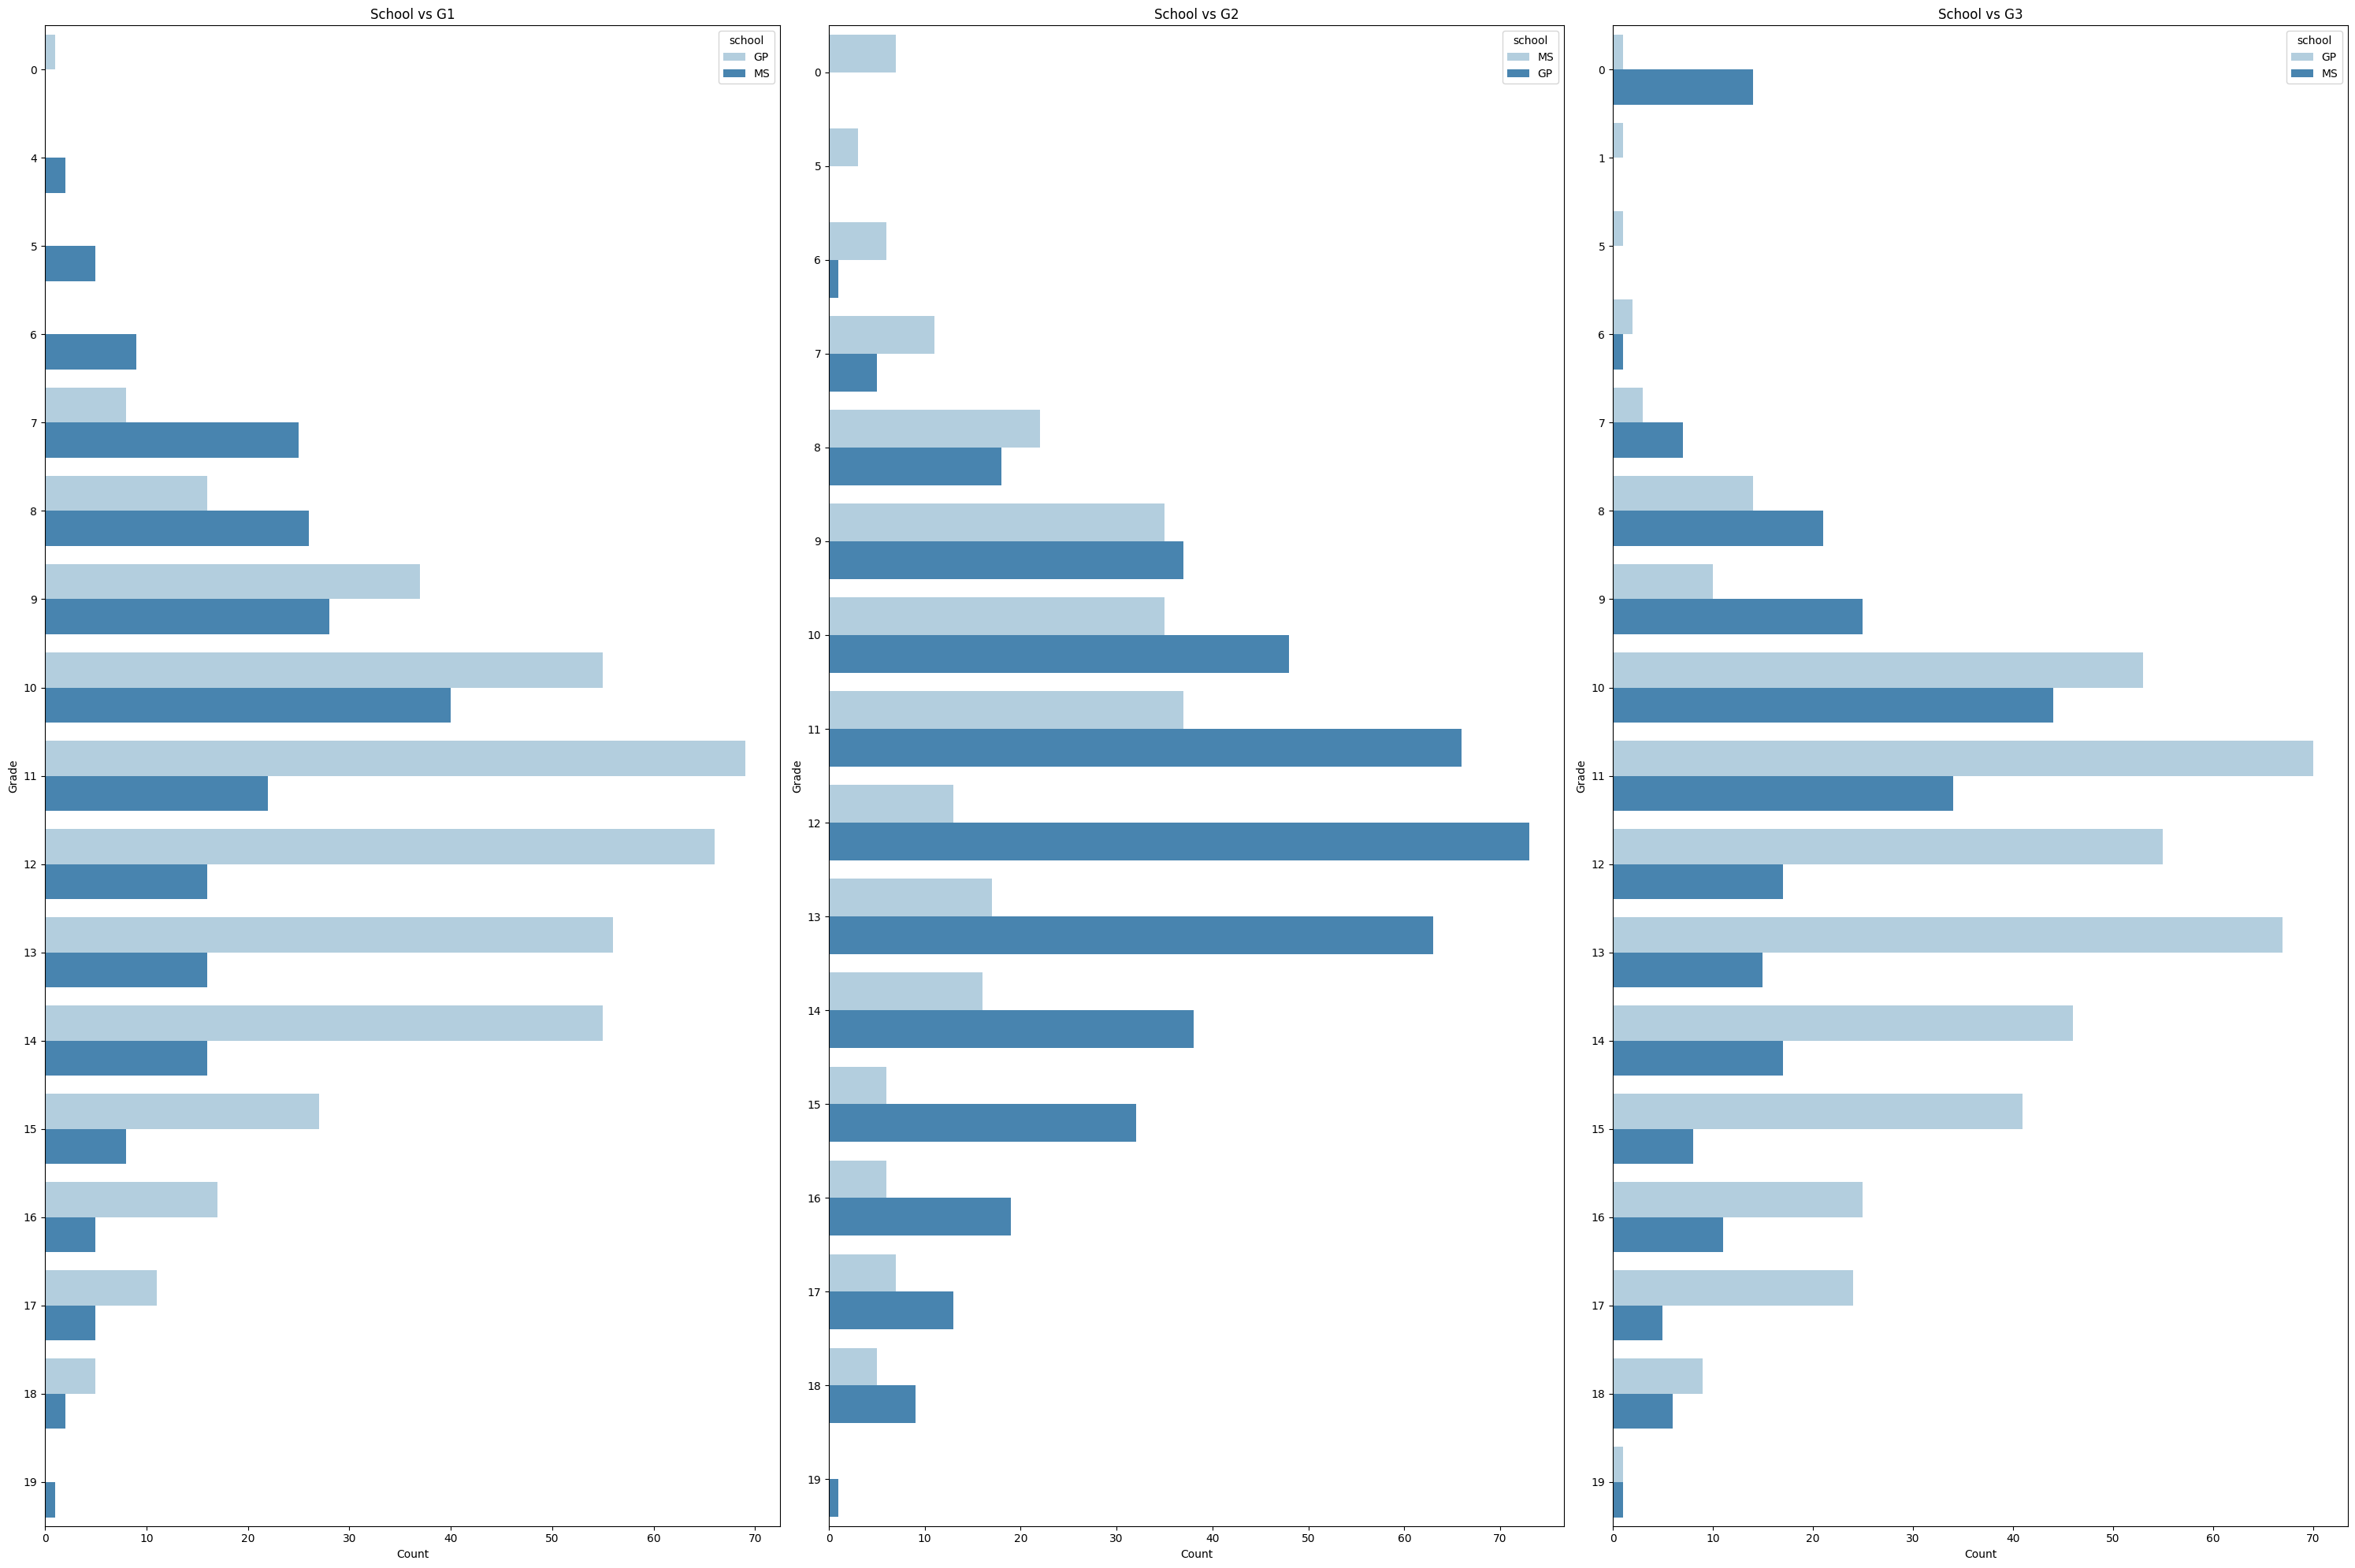

G1 
    school  G1  count
0      GP   0      1
1      GP   7      8
2      GP   8     16
3      GP   9     37
4      GP  10     55
5      GP  11     69
6      GP  12     66
7      GP  13     56
8      GP  14     55
9      GP  15     27
10     GP  16     17
11     GP  17     11
12     GP  18      5
13     MS   4      2
14     MS   5      5
15     MS   6      9
16     MS   7     25
17     MS   8     26
18     MS   9     28
19     MS  10     40
20     MS  11     22
21     MS  12     16
22     MS  13     16
23     MS  14     16
24     MS  15      8
25     MS  16      5
26     MS  17      5
27     MS  18      2
28     MS  19      1


G2 
    school  G2  count
0      GP   6      1
1      GP   7      5
2      GP   8     18
3      GP   9     37
4      GP  10     48
5      GP  11     66
6      GP  12     73
7      GP  13     63
8      GP  14     38
9      GP  15     32
10     GP  16     19
11     GP  17     13
12     GP  18      9
13     GP  19      1
14     MS   0      7
15     MS   5      3
1

In [60]:
# Create subplots with 1 row and 3 columns, adjusting figure size
fig, axes = plt.subplots(1, 3, figsize=(30, 20))

# Iterate through grade periods and plot
for i, grade in enumerate(['G1', 'G2', 'G3']):
    sns.countplot(data=df, y=grade, hue='school', ax=axes[i], palette='Blues', dodge=True)
    axes[i].set_title(f'School vs {grade}')  # Set title for each subplot
    axes[i].set_ylabel('Grade')  # Set label for y-axis
    axes[i].set_xlabel('Count')  # Set label for x-axis

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

# Define columns for grade periods
columns = ["G1", "G2", "G3"]

# Iterate through grade periods
for i in range(len(columns)):
    # Group the DataFrame by 'school' and the current grade period, counting occurrences, and reset the index
    school_counts = df.groupby(["school", columns[i]]).size().reset_index(name="count")
    # Print the results
    print(columns[i],"\n",school_counts)
    print("\n")

### Data Preprocessing

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [64]:
# Importing necessary library
from sklearn.preprocessing import LabelEncoder

# Creating a LabelEncoder object
label_encoder = LabelEncoder()

# List of columns to be encoded
Columns = ["school","sex","address","famsize","Pstatus","Mjob","Fjob","reason","guardian","schoolsup","famsup","paid","activities",
                "nursery","higher","internet","romantic"]

# Iterate through each column and perform label encoding
for i in range(len(Columns)):
    # Retrieve the unique values in the column
    columns_keys = df[Columns[i]]
    columns_keys = columns_keys.tolist()
    
    # Perform label encoding
    columns_values = label_encoder.fit_transform(df[Columns[i]])          #shouldn't fit_transform in full dataset
    columns_values = columns_values.tolist()
    
    # Update the DataFrame with the encoded values
    df[Columns[i]] = label_encoder.fit_transform(df[Columns[i]])
    
    # Create a dictionary mapping original values to encoded values
    columns_dict = dict(zip(columns_keys, columns_values))
    # Print the dictionary
    print(columns_dict)

{'GP': 0, 'MS': 1}
{'F': 0, 'M': 1}
{'U': 1, 'R': 0}
{'GT3': 0, 'LE3': 1}
{'A': 0, 'T': 1}
{'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}
{'teacher': 4, 'other': 2, 'services': 3, 'health': 1, 'at_home': 0}
{'course': 0, 'other': 2, 'home': 1, 'reputation': 3}
{'mother': 1, 'father': 0, 'other': 2}
{'yes': 1, 'no': 0}
{'no': 0, 'yes': 1}
{'no': 0, 'yes': 1}
{'no': 0, 'yes': 1}
{'yes': 1, 'no': 0}
{'yes': 1, 'no': 0}
{'no': 0, 'yes': 1}
{'no': 0, 'yes': 1}


Text(0.5, 1.0, 'Correlation Heatmap')

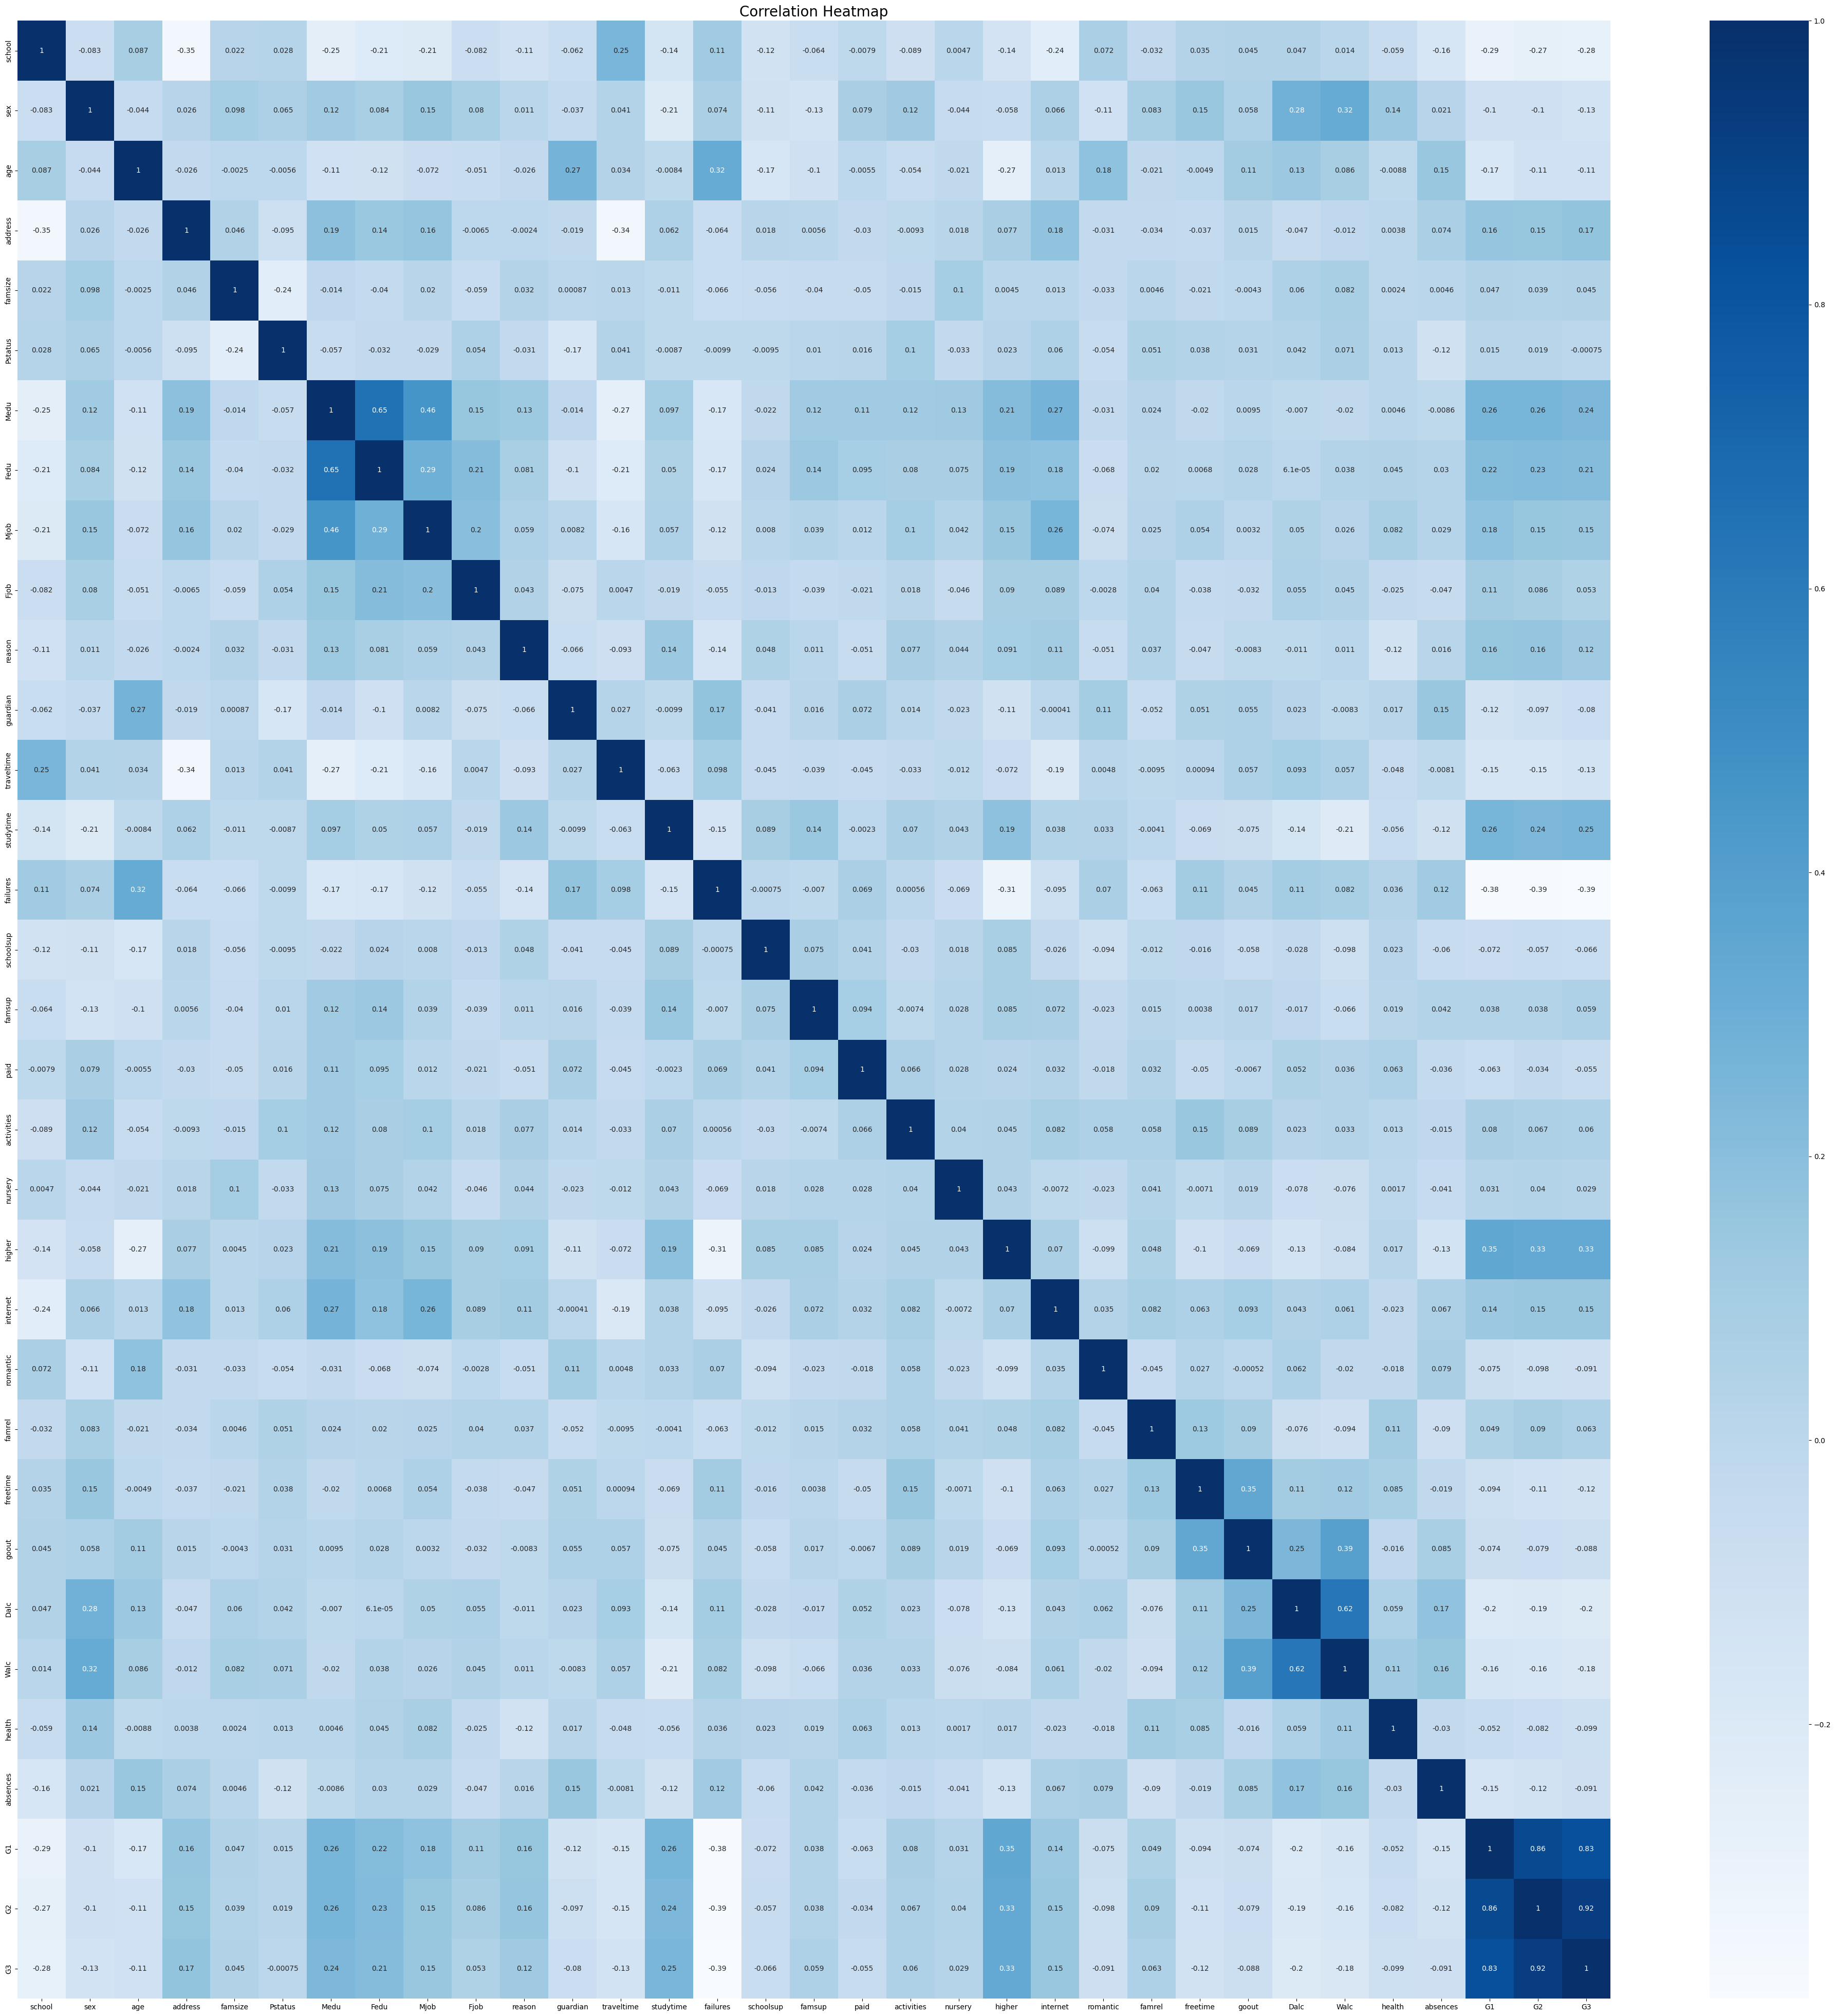

In [65]:
# Calculate the correlation matrix
corr = df.corr()

# Create a figure with a large size
plt.figure(figsize=(50,50))

# Plot the heatmap using seaborn, with annotations and a blue colormap
sns.heatmap(corr, annot=True, cmap="Blues")

# Set the title of the plot
plt.title('Correlation Heatmap', fontsize=20)

<Axes: xlabel='G1'>

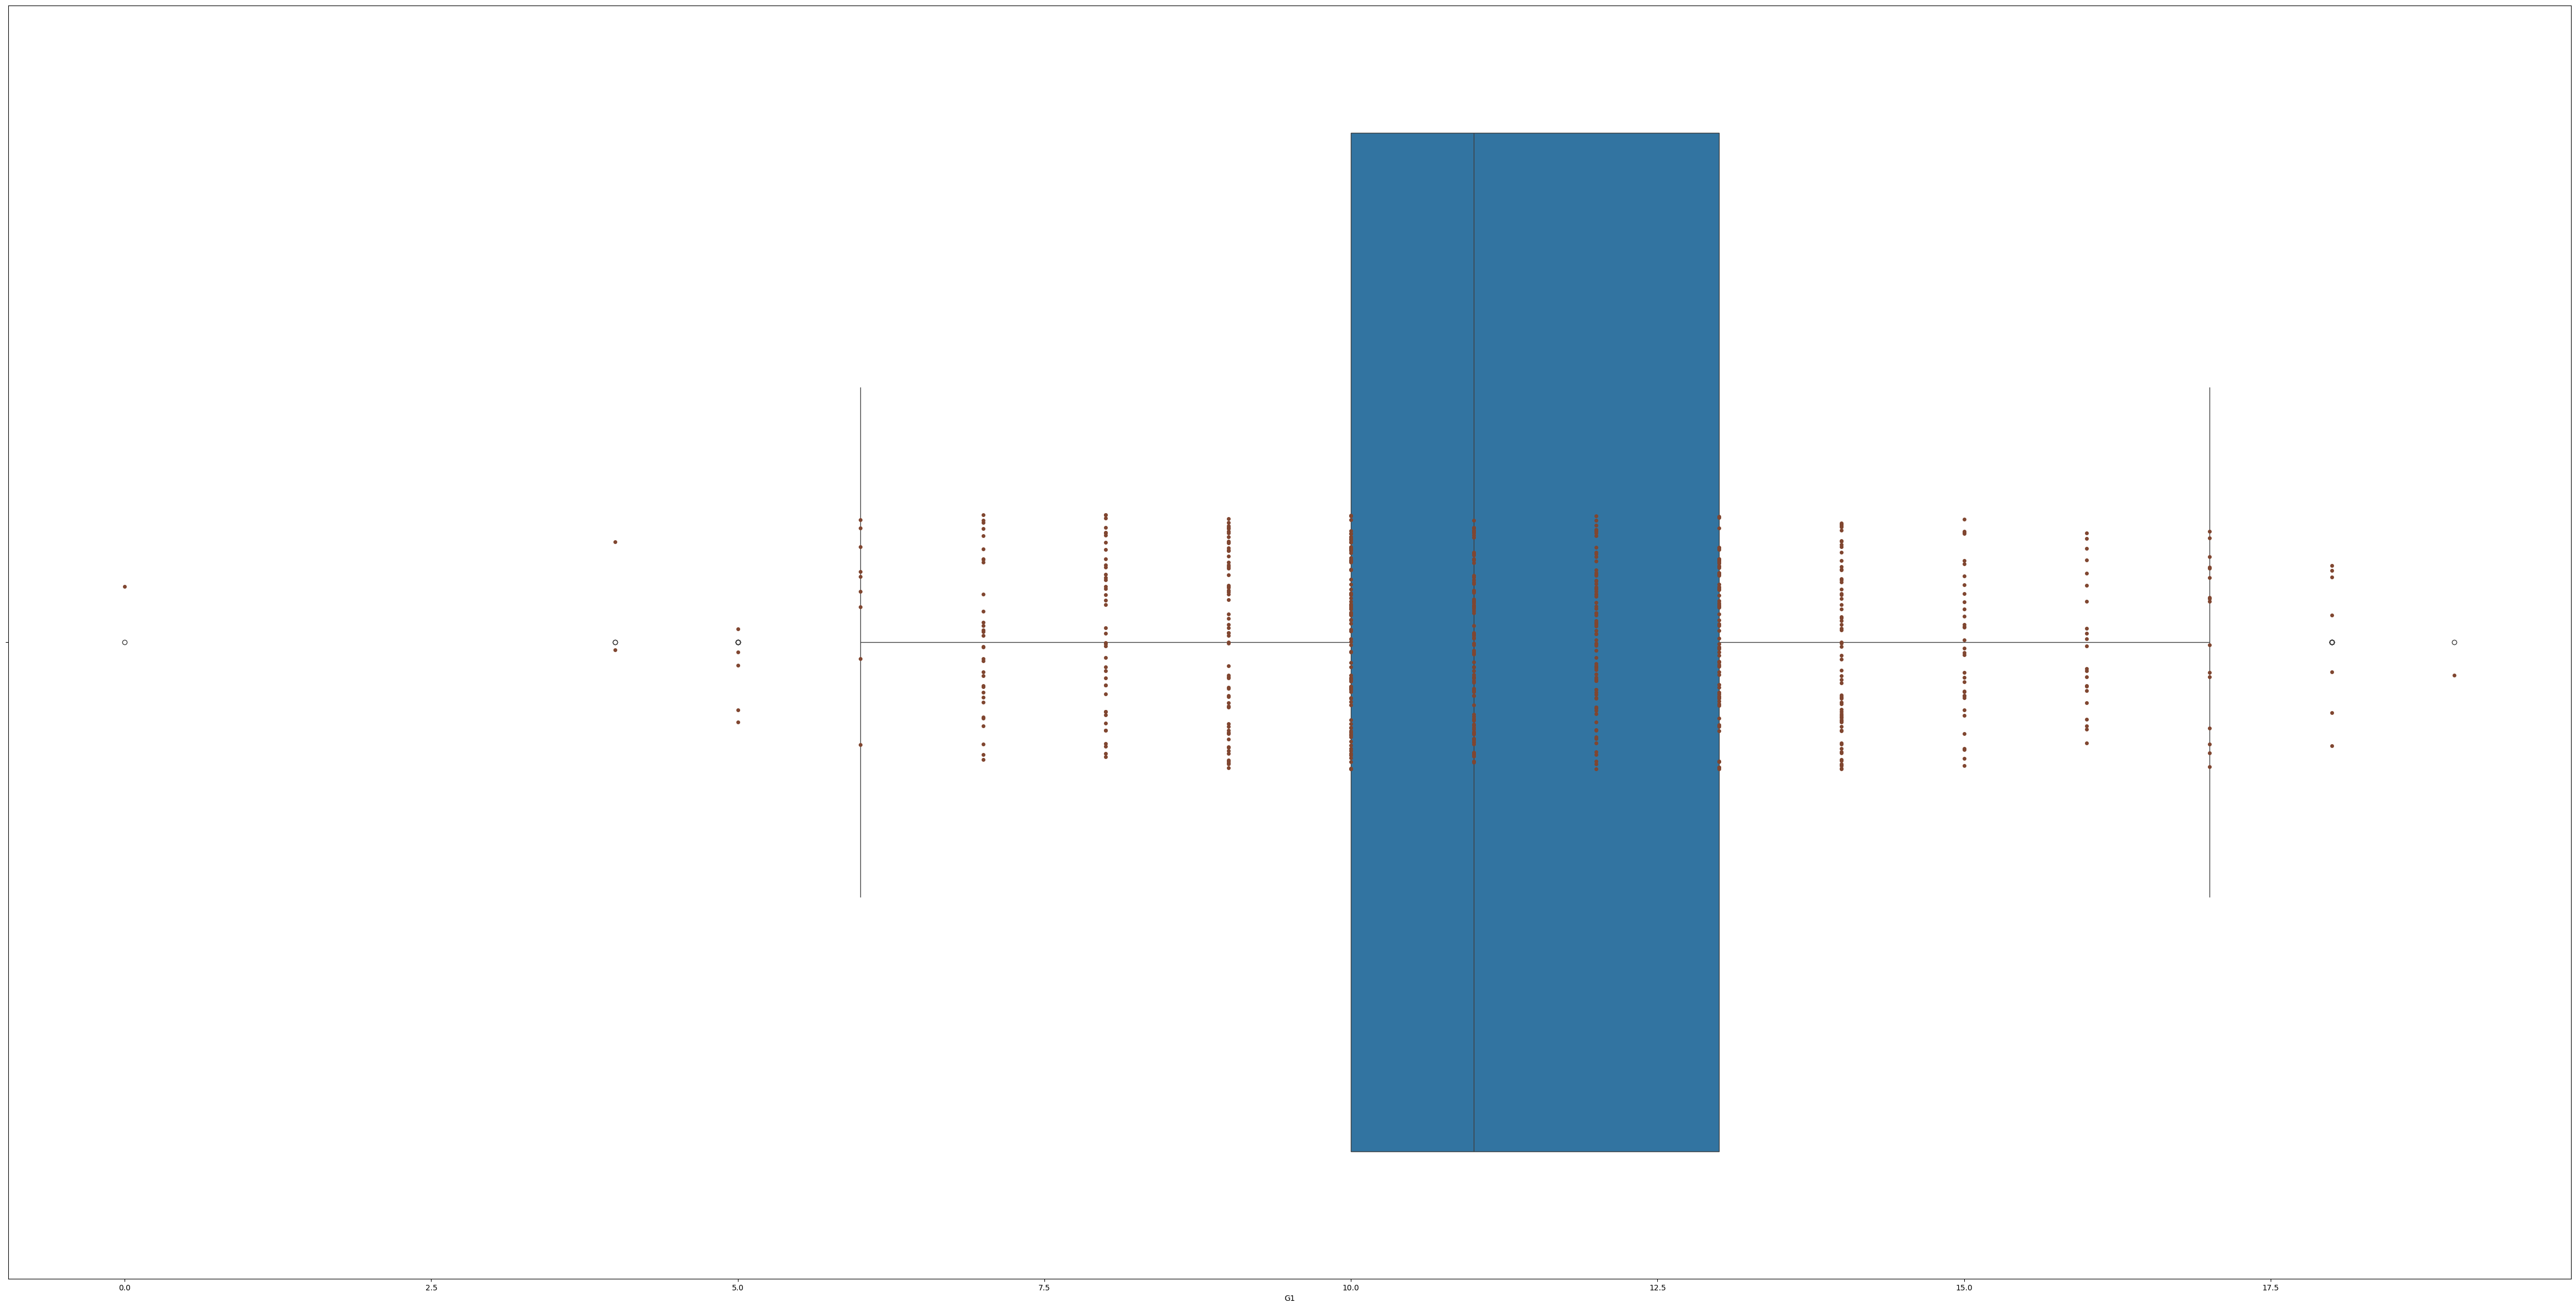

In [66]:
# cheaking the outliers in the feature 'G1'
plt.figure(figsize = (60,30))
sns.boxplot(x='G1', data=df)
sns.stripplot(x='G1', data=df, color="#804630")

<Axes: xlabel='G2'>

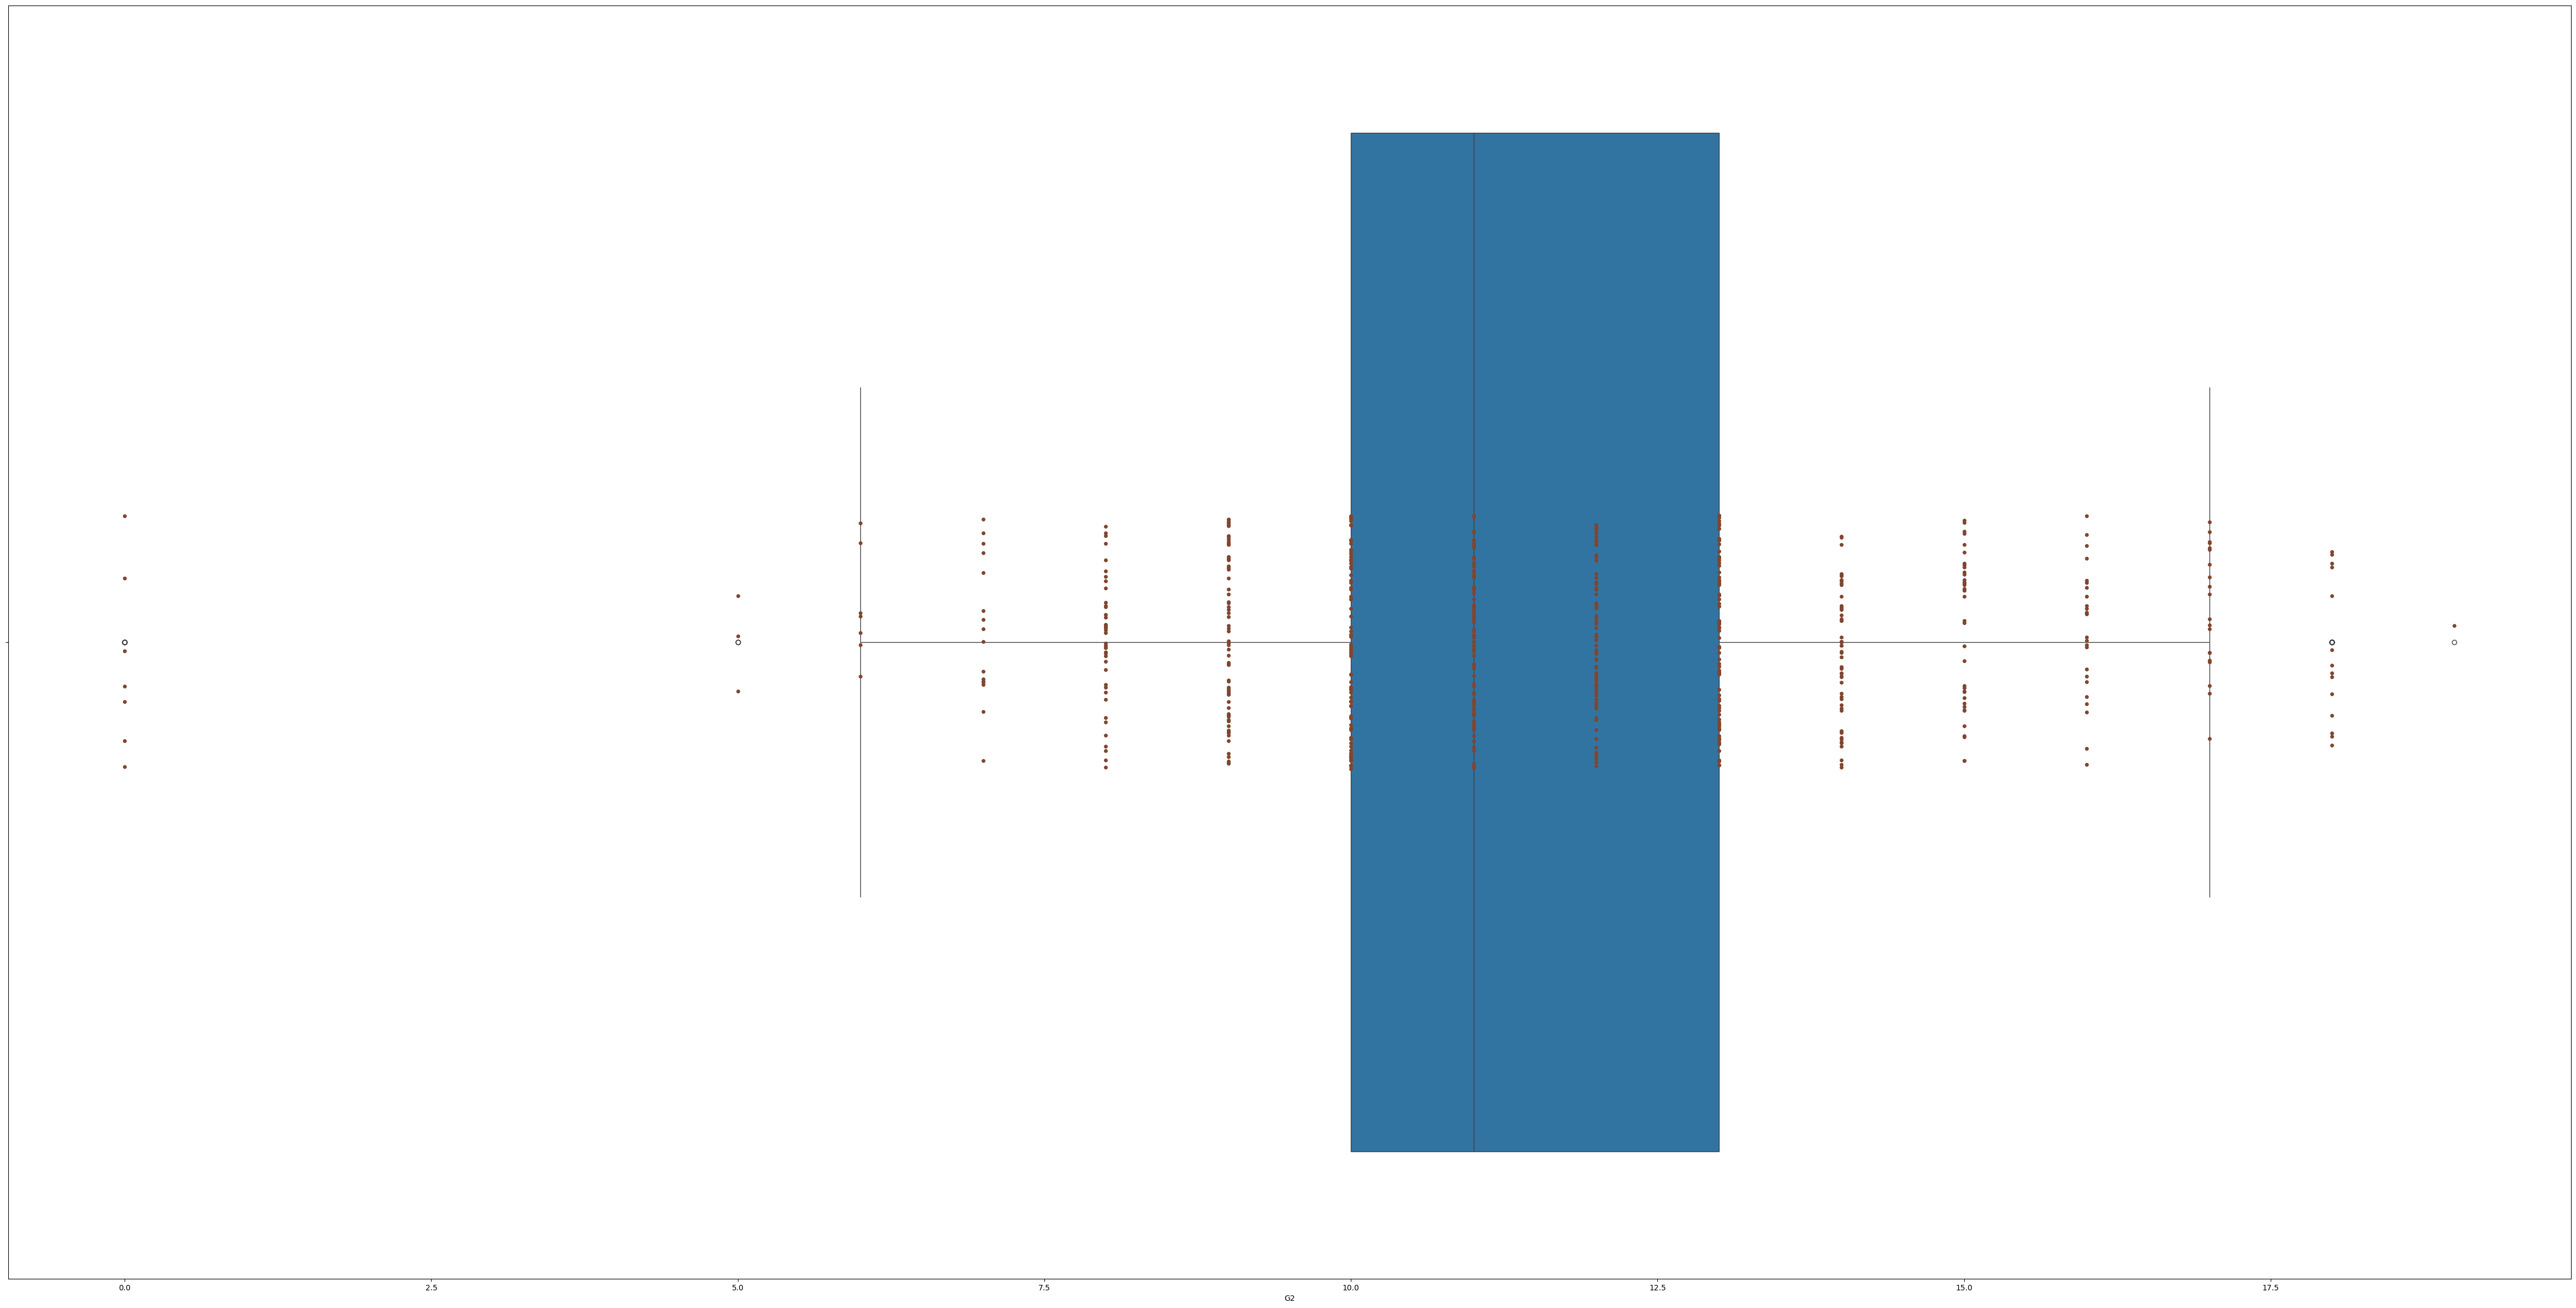

In [67]:
# cheaking the outliers in the feature 'G2'
plt.figure(figsize = (60,30))
sns.boxplot(x='G2', data=df)
sns.stripplot(x='G2', data=df, color="#804630")

In [68]:
np.abs(stats.zscore(df))
np.abs(stats.zscore(df)).shape
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]   #excluding z_score<-3 and z_score>3
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13
5,0,1,16,1,1,1,4,3,3,2,...,5,4,2,1,2,5,6,12,12,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,1,0,18,0,0,1,4,4,4,0,...,4,4,3,2,2,5,4,7,9,10
644,1,0,19,0,0,1,2,3,3,2,...,5,4,2,1,2,5,4,10,11,10
645,1,0,18,1,1,1,3,1,4,3,...,4,3,4,1,1,1,4,15,15,16
647,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,6,10,10,10


### Feature selection

In [ ]:
# We will apply feature selection method that can help us to choose the effective features in model 
# instead of choosing all the effective ones and non-effective ones that can help us in best modeling 

In [73]:
x = df.drop('G3', axis=1)
y = df['G3']

In [74]:
all_features = x.columns
all_features

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

In [76]:
# Taking object from the library to use the model.
# Use gini criterion to define feature importance.
dtc = DecisionTreeClassifier(random_state=0, criterion='entropy') 

In [77]:
selector = SelectFromModel(estimator=dtc)

In [78]:
selector.fit(x, y)     #shouldn't fit on full dataset

SelectFromModel(estimator=DecisionTreeClassifier(criterion='entropy',
                                                 random_state=0))

In [79]:
selector.get_support(indices=True)

array([27, 29, 30, 31])

In [80]:
selected_features_idx = selector.get_support(indices=True)
selected_features_idx

array([27, 29, 30, 31])

In [81]:
selected_features = all_features[selected_features_idx]
selected_features

Index(['Walc', 'absences', 'G1', 'G2'], dtype='object')

In [82]:
feat = ['Walc', 'absences', 'G1', 'G2']

### Model and Optimaization

#### Random Forest Regression model

In [83]:
# Random Forest Regression model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

# Separate features and target variable
features = df[feat]  # Features
target = df['G3']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest Regression with specified parameters
RFR = RandomForestRegressor(random_state=100, criterion='squared_error', max_depth=30, min_samples_leaf=5, n_jobs=1)

# Train the regression
RFR.fit(X_train, y_train)

# Predict on the testing data
y_pred = RFR.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("RFR Root Mean Squared Error RMSE:", rmse)
print("RFR R^2 Score:", r2)

RFR Root Mean Squared Error RMSE: 0.7043367927816625
RFR R^2 Score: 0.9118082588238923


In [94]:
# Get the list of available parameters in Random Forest Regression model
parameters = RandomForestRegressor().get_params().keys()

# Print the list of available parameters
print(parameters)

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])


In [140]:
# using Gridsearch for best performancing Random Forest Regression model (OPTIMAIZATION)
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ["squared_error", "absolute_error"]
              ,'max_depth' :  [4,8,12]
              ,'n_estimators': [10,15,20]
              ,'random_state' : [5,11,13,30,42,101]
              }
grid = GridSearchCV(RandomForestRegressor(),param_grid,cv = 5,n_jobs=-1)
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 4,
 'n_estimators': 15,
 'random_state': 11}

In [141]:
grid.best_estimator_

RandomForestRegressor(max_depth=4, n_estimators=15, random_state=11)

In [142]:
grid_predictions = grid.predict(X_test)

rmse = root_mean_squared_error(y_test, grid_predictions)


r2 = r2_score(y_test, grid_predictions)

print("Optimaized RFR Root Mean Squared Error RMSE:", rmse)
print("Optimaized RFR R^2 Score:", r2)

Optimaized RFR Root Mean Squared Error RMSE: 0.7031674625801098
Optimaized RFR R^2 Score: 0.9121008451660235


#### Decision Tree Regression model

In [143]:
# Decision Tree Regression model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

# Separate features and target variable
features = df[feat]  # Features
target = df['G3']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regression with specified parameters
DTR = DecisionTreeRegressor(random_state=100, criterion='squared_error', max_depth=30, min_samples_leaf=5)

# Train the regression
DTR.fit(X_train, y_train)

# Predict on the testing data
y_pred = DTR.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)


r2 = r2_score(y_test, y_pred)

print("DTR Root Mean Squared Error RMSE:", rmse)
print("DTR R^2 Score:", r2)

DTR Root Mean Squared Error RMSE: 0.7403617550767231
DTR R^2 Score: 0.9025559965052704


In [144]:
# Get the list of available parameters in Decision Tree Regression model
parameters = DecisionTreeRegressor().get_params().keys()

# Print the list of available parameters
print(parameters)

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'random_state', 'splitter'])


In [146]:
# using Gridsearch for best performancing Decision Tree Regression model (OPTIMAIZATION)
from sklearn.model_selection import GridSearchCV
number = [5,11,13,41,42,101]
numbers = list(range(1, 31))
param_grid = {'criterion' : ["squared_error", "absolute_error", "friedman_mse", "poisson"]
              ,'max_depth' :  [4,8,12]
              ,'random_state' : [5,11,13,30,42,101]
              ,'min_samples_leaf' :  [4,6,8]
              }
grid = GridSearchCV(DecisionTreeRegressor(),param_grid,cv = 5)
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 4,
 'min_samples_leaf': 4,
 'random_state': 42}

In [147]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=4, min_samples_leaf=4, random_state=42)

In [148]:
grid_predictions = grid.predict(X_test)

rmse = root_mean_squared_error(y_test, grid_predictions)

r2 = r2_score(y_test, grid_predictions)

print("Optimaized DTR Root Mean Squared Error RMSE:", rmse)
print("Optimaized DTR R^2 Score:", r2)

Optimaized DTR Root Mean Squared Error RMSE: 0.7457957925915756
Optimaized DTR R^2 Score: 0.9011203264242355


#### Linear Regression model

In [149]:
# Linear Regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

# Separate features and target variable
features = df[feat]  # Features
target = df['G3']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Linear Regression with specified parameters
LR = LinearRegression(fit_intercept= True ,n_jobs = 1)

# Train the regression
LR.fit(X_train, y_train)

# Predict on the testing data
y_pred = LR.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("LR Root Mean Squared Error RMSE:", rmse)
print("LR R^2 Score:", r2)

LR Root Mean Squared Error RMSE: 0.7060864861219908
LR R^2 Score: 0.9113695477749233


In [150]:
# Get the list of available parameters in Decision Tree Regression model
parameters = LinearRegression().get_params().keys()

# Print the list of available parameters
print(parameters)

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'positive'])


In [151]:
# using Gridsearch for best performancing Linear Regression model (OPTIMAIZATION)
from sklearn.model_selection import GridSearchCV

param_grid = {'fit_intercept': [True, False]
              }
grid = GridSearchCV(LinearRegression(),param_grid,cv = 5,n_jobs=-1)
grid.fit(X_train,y_train)
grid.best_params_

{'fit_intercept': True}

In [152]:
grid.best_estimator_

LinearRegression()

In [153]:
grid_predictions = grid.predict(X_test)

rmse = root_mean_squared_error(y_test, grid_predictions)


r2 = r2_score(y_test, grid_predictions)

print("Optimaized LR Root Mean Squared Error RMSE:", rmse)
print("Optimaized LR R^2 Score:", r2)

Optimaized LR Root Mean Squared Error RMSE: 0.7060864861219908
Optimaized LR R^2 Score: 0.9113695477749233


#### Support Vector Machine Regression model

In [154]:
# Support Vector Machine Regression model
from sklearn.svm import SVR

# Separate features and target variable
features = df[feat]  # Features
target = df['G3']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Support Vector Machine Regression  with specified parameters
SVMR = SVR(kernel ='poly')

# Train the regression
SVMR.fit(X_train, y_train)

# Predict on the testing data
y_pred = SVMR.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)


r2 = r2_score(y_test, y_pred)


print("SVMR Root Mean Squared Error RMSE:", rmse)
print("SVMR R^2 Score:", r2)

SVMR Root Mean Squared Error RMSE: 0.8744213743492635
SVMR R^2 Score: 0.8640720722465627


In [155]:
# Get the list of available parameters in Support Vector Machine Regression model
parameters = SVR().get_params().keys()

# Print the list of available parameters
print(parameters)

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])


In [156]:
# using Gridsearch for best performancing Support Vector Machine Regression model (OPTIMAIZATION)
from sklearn.model_selection import GridSearchCV
param_grid = {'gamma' : ['scale', 'auto'],
              'kernel' : ['linear', 'rbf', 'sigmoid'],
              'degree' :  [5,11,13,30,42,101]}
grid = GridSearchCV(SVR(),param_grid,refit=True, verbose=3, cv = 5,n_jobs=-1)
grid.fit(X_train,y_train)
grid.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END degree=5, gamma=scale, kernel=linear;, score=0.924 total time=   0.0s
[CV 2/5] END .degree=5, gamma=scale, kernel=rbf;, score=0.934 total time=   0.0s
[CV 1/5] END .degree=5, gamma=scale, kernel=rbf;, score=0.909 total time=   0.0s
[CV 3/5] END .degree=5, gamma=scale, kernel=rbf;, score=0.890 total time=   0.0s
[CV 4/5] END .degree=5, gamma=scale, kernel=rbf;, score=0.853 total time=   0.0s
[CV 5/5] END .degree=5, gamma=scale, kernel=rbf;, score=0.848 total time=   0.0s
[CV 3/5] END degree=5, gamma=scale, kernel=linear;, score=0.904 total time=   0.0s
[CV 2/5] END degree=5, gamma=scale, kernel=linear;, score=0.927 total time=   0.0s
[CV 5/5] END degree=5, gamma=scale, kernel=linear;, score=0.855 total time=   0.0s
[CV 1/5] END degree=5, gamma=scale, kernel=sigmoid;, score=-3.880 total time=   0.0s
[CV 2/5] END degree=5, gamma=scale, kernel=sigmoid;, score=-3.774 total time=   0.0s
[CV 3/5] END degree=5, gamma=sc

{'degree': 5, 'gamma': 'scale', 'kernel': 'linear'}

In [157]:
grid.best_estimator_

SVR(degree=5, kernel='linear')

In [158]:
grid_predictions = grid.predict(X_test)

rmse = root_mean_squared_error(y_test, grid_predictions)


r2 = r2_score(y_test, grid_predictions)

print("Optimaized SVMR Root Mean Squared Error RMSE:", rmse)
print("Optimaized SVMR R^2 Score:", r2)

Optimaized SVMR Root Mean Squared Error RMSE: 0.7035533052150585
Optimaized SVMR R^2 Score: 0.9120043545053601


#### XGBoost Regression model

In [159]:
# XGBoost Regression model
from xgboost import XGBRegressor

# Separate features and target variable
features = df[feat]  # Features
target = df['G3']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the XGBoost Regression with specified parameters
XGBR = XGBRegressor(gamma= 0.3, random_state= 42, n_estimators=11, n_jobs= -1, max_depth=10)

# Train the regression
XGBR.fit(X_train, y_train)

# Predict on the testing data
y_pred = XGBR.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)


r2 = r2_score(y_test, y_pred)

print("XGBR Root Mean Squared Error RMSE:", rmse)
print("XGBR R^2 Score:", r2)

XGBR Root Mean Squared Error RMSE: 0.7508328836343456
XGBR R^2 Score: 0.8997801542282104


In [160]:
# Get the list of available parameters in XGBoost Regression model
parameters = XGBRegressor().get_params().keys()

# Print the list of available parameters
print(parameters)

dict_keys(['objective', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'device', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'feature_types', 'gamma', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_threshold', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'multi_strategy', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])


In [161]:
# using Gridsearch for best performancing XGBoost Regression model (OPTIMAIZATION)
from sklearn.model_selection import GridSearchCV

param_grid = {'random_state' : [5,11,13,30,42,101],
              'n_estimators' : [10,15,20],
              'max_depth': [4,8,12],
              'learning_rate': [0.1, 0.5, 0.9]
              }
grid = GridSearchCV(XGBRegressor(), param_grid, cv = 5,n_jobs=-1)
grid.fit(X_train,y_train)
grid.best_params_

{'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 10, 'random_state': 5}

In [162]:
grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=5, ...)

In [163]:
grid_predictions = grid.predict(X_test)

rmse = root_mean_squared_error(y_test, grid_predictions)


r2 = r2_score(y_test, grid_predictions)

print("Optimaized XGBR Root Mean Squared Error RMSE:", rmse)
print("Optimaized XGBR R^2 Score:", r2)

Optimaized XGBR Root Mean Squared Error RMSE: 0.7073601542601576
Optimaized XGBR R^2 Score: 0.911049485206604


#### K Nearest Neighbors Regression model

In [164]:
# K Nearest Neighbors Regression model
from sklearn.neighbors import KNeighborsRegressor

# Separate features and target variable
features = df[feat]  # Features
target = df['G3']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the K Nearest Neighbors Regression model with specified parameters
KNNR = KNeighborsRegressor(n_neighbors= 7, n_jobs= 1, metric= 'manhattan')

# Train the regression
KNNR.fit(X_train, y_train)

# Predict on the testing data
y_pred = KNNR.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)


r2 = r2_score(y_test, y_pred)

print("KNNR Root Mean Squared Error RMSE:", rmse)
print("KNNR R^2 Score:", r2)

KNNR Root Mean Squared Error RMSE: 0.7591059329775455
KNNR R^2 Score: 0.8975594414716712


In [165]:
# Get the list of available parameters in K Nearest Neighbors Regression model
parameters = KNeighborsRegressor().get_params().keys()

# Print the list of available parameters
print(parameters)

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])


In [166]:
# using Gridsearch for best performancing K Nearest Neighbors Regression model (OPTIMAIZATION)
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [5,11,13,41,42,101],
              'metric' : ['manhattan','euclidean','minkowski']}
grid = GridSearchCV(KNeighborsRegressor(),param_grid,cv = 5,n_jobs=-1)
grid.fit(X_train,y_train)
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 13}

In [167]:
grid.best_estimator_

KNeighborsRegressor(metric='manhattan', n_neighbors=13)

In [168]:
grid_predictions = grid.predict(X_test)

rmse = root_mean_squared_error(y_test, grid_predictions)


r2 = r2_score(y_test, grid_predictions)

print("Optimaized KNNR Root Mean Squared Error RMSE:", rmse)
print("Optimaized KNNR R^2 Score:", r2)

Optimaized KNNR Root Mean Squared Error RMSE: 0.7804694241607377
Optimaized KNNR R^2 Score: 0.8917123438745731
